# Spotify Skip Classification Project
## Team 21
### By Courtney Wilkerson, Carlos Munoz Pedroza, Morgan Levy, and Joseph Maydwell 

## Project Description

Our project is finding the best model to predict whether a user is going to skip on a certain Spotify song or not. We will first take a deep dive into our data and engineer new features for our model. We will then be looking at models we learned in this course as well as new models to see which one preforms best. We will apply hyperparameter tuning on our best models and conclude with our best preforming machine learning model for this problem. This is a real life machine learning problem that engineers are studing at Spotify. Our dataset can be found here: [Spotify Datasets](https://www.aicrowd.com/challenges/spotify-sequential-skip-prediction-challenge)

## Data Analysis

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import random
from collections import Counter


In [6]:
df = pd.read_csv("../log_mini.csv")
df.head()


,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


### Data pre-processing

##### Bool to int variables

Re-express the target variable from bool to int.

In [7]:
df['skipped'] = ~df['not_skipped']
df.drop('not_skipped', axis=1, inplace=True)
df = df.replace({True: 1, False: 0})
df.describe()


,session_position,session_length,skip_1,skip_2,skip_3,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,skipped
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.421503,0.517179,0.648380,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,0.308732,14.193084,0.810418,0.667119
std,5.457638,3.422025,0.493801,0.499706,0.477478,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,0.461972,5.996243,0.391971,0.471246
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.000000,0.000000
50%,9.000000,20.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,1.000000
75%,14.000000,20.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,1.000000,1.000000
max,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60.000000,151.000000,1.000000,23.000000,1.000000,1.000000


The initial analysis over the target variable shows that 66% of the songs are skipped at some point. 42% of the tracks are only played very briefly (dataset description doesn't specifies what does very briefly means).

##### Variables not available at prediciton time

The first thing to note is that we don't have missing values, but since session logs are recorded after finishing the session we need to remove all the information not available at the time of the prediction.

The `session_length` need to be removed, since at the time of the prediction we only know the session lenght up to the current song, but not the complete session lenght.

The variable `hist_user_behavior_reason_end`describes the end reason for a track. Since this is related to the target variable we will remove it.

The variables `hist_user_behavior_n_seekfwd` and `hist_user_behavior_n_seekback` describes the behavior of the user while using the song and need to be droped. In this case we can create a new feature that signals if the user seekback or forward during the last track played before the current one.

In [8]:
df.drop("session_length", axis=1, inplace=True)
df.drop("hist_user_behavior_reason_end", axis=1, inplace=True)

# New features: Shift seek variables from previous to current track
df = df.sort_values(by=['session_id', 'session_position'], ascending=True)
df['hist_user_behavior_n_seekfwd'] = df.groupby(['session_id'])['hist_user_behavior_n_seekfwd'].shift(1)
df['hist_user_behavior_n_seekfwd'] = df['hist_user_behavior_n_seekfwd'].fillna(0).astype('int64')

df['hist_user_behavior_n_seekback'] = df.groupby(['session_id'])['hist_user_behavior_n_seekback'].shift(1)
df['hist_user_behavior_n_seekback'] = df['hist_user_behavior_n_seekback'].fillna(0).astype('int64')


##### Date-time variables

We have analyzed the time of the day effect. The skipped rate seem to increase after lunch time. We will remove the `date` field.

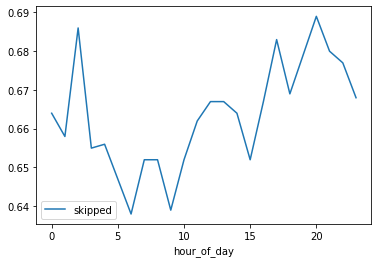

In [9]:
df[["skipped", "hour_of_day"]].groupby(["hour_of_day"]).mean().round(3).plot()
df.drop("date", axis=1, inplace=True)


So far we have get ride of information that won't be available at the time of prediction or information that is likely to have a low predictive power. We now proceed to analyze the information in a deeper way.

###### General Analysis

In [10]:
df.corr()

,session_position,skip_1,skip_2,skip_3,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,skipped
session_position,1.000000,0.055365,0.040010,0.001222,-0.020918,0.194384,0.027115,0.023199,-0.024474,-0.015540,0.012484,-0.004032,0.023865,-0.005463
skip_1,0.055365,1.000000,0.824751,0.628597,-0.094305,0.191440,-0.129213,-0.163313,-0.010183,-0.002979,0.052393,0.011958,-0.027076,0.602966
skip_2,0.040010,0.824751,1.000000,0.762141,-0.073632,0.105180,-0.033340,-0.073393,0.012220,-0.000048,0.048836,0.009774,-0.016049,0.731088
skip_3,0.001222,0.628597,0.762141,1.000000,-0.042541,-0.064818,0.117503,0.081010,0.023529,0.002975,0.033876,0.013727,-0.004615,0.959225
context_switch,-0.020918,-0.094305,-0.073632,-0.042541,1.000000,0.003908,0.009697,0.028170,0.036080,0.011744,-0.045769,-0.002287,0.023390,-0.035617
no_pause_before_play,0.194384,0.191440,0.105180,-0.064818,0.003908,1.000000,-0.753359,-0.830743,0.006139,0.000577,-0.017914,-0.013401,0.010235,-0.080246
short_pause_before_play,0.027115,-0.129213,-0.033340,0.117503,0.009697,-0.753359,1.000000,0.906850,0.002138,0.004323,0.030871,0.014678,0.027277,0.126978
long_pause_before_play,0.023199,-0.163313,-0.073393,0.081010,0.028170,-0.830743,0.906850,1.000000,0.009498,0.011009,0.022136,0.014715,-0.008371,0.092755
hist_user_behavior_n_seekfwd,-0.024474,-0.010183,0.012220,0.023529,0.036080,0.006139,0.002138,0.009498,1.000000,0.270973,-0.018941,-0.006136,-0.008471,0.023994
hist_user_behavior_n_seekback,-0.015540,-0.002979,-0.000048,0.002975,0.011744,0.000577,0.004323,0.011009,0.270973,1.000000,-0.025344,-0.002132,-0.006916,0.002524


After reading the correlation table, we can see that the none of the variables have strong correlation with the target value. The most important variables are:
    
    1. Short pause before play with 0.126
    2. Long pause before play with 0.092
    3. No pause before play -0.080

We dont't have strong correlation among the explanatory variables, except for short and long pause. This menas that even if those are the most relevant variables to explain if a song will be skipped their predictive power will be reduced if both are used.

The next question we would like to answer is if users skip songs evenly during the whole session. The following chart shows that during the third and nine track the percentage of skips is reduced up to 4%.

<AxesSubplot:xlabel='session_position', ylabel='skipped'>

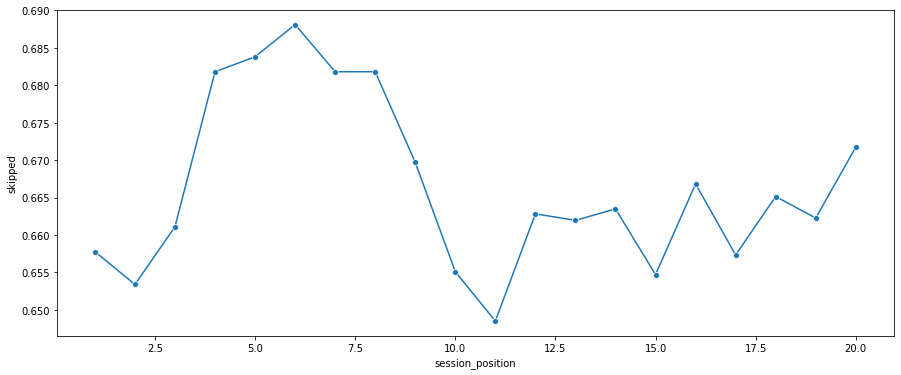

In [11]:
session_pos_df = df[['session_position', 'skipped']]
session_pos_df = session_pos_df.groupby('session_position').mean().stack().reset_index()
session_pos_df.columns = ['session_position', 'event', 'skipped']

plt.figure(figsize=(15,6))
sns.lineplot(x="session_position", y="skipped", data=session_pos_df, marker="o")

Since this variables seems to have low predictive power we would like to extract new variables frmo the dataset.

In [12]:
df = df.sort_values(by=['session_id', 'session_position'], ascending=True)

# New features: Previous song was skiped
df['previous_skipped'] = df.groupby(['session_id'])['skipped'].shift(1)
df['previous_skipped'] = df['previous_skipped'].fillna(0).astype('int64')

# New features: Count previous skips in session
df['previous_skipped_count'] = df.groupby(['session_id'])['previous_skipped'].cumsum()
df['previous_skipped_count'] = df['previous_skipped_count'].fillna(0).astype('int64')


We will include the variables from the track features data set. After merging both datasets we have 51 variables. From this variables we decided to discard the 'track_id_clean' and 'track_id' variables, since they have high cardinality, and we will use the characteristics of the track instead of the tracks' randomnly assigned id for our predictions. Since the number of variables will be increased considerably we will calculate the correlation of each variable with the target variable instead of the whole correlation matrix.

In [13]:
tf = pd.read_csv("../tf_mini.csv")

df = pd.merge(df, tf, left_on="track_id_clean", right_on="track_id", how="left")

df.drop("track_id_clean", axis=1, inplace=True)
df.drop("track_id", axis=1, inplace=True)

df.head()

,session_id,session_position,skip_1,skip_2,skip_3,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,0,0,0,0,0,0,0,0,...,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,0,0,0,0,1,0,0,0,...,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,0,0,0,0,1,0,0,0,...,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,0,0,0,0,1,0,0,0,...,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,0,0,0,0,1,0,0,0,...,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315


Due to the intertemporal character of the problem we will create a laged version for every track characteristic.

In [14]:
track_columns = ['duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence', 'acoustic_vector_0',
       'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3',
       'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6',
       'acoustic_vector_7']

for var in track_columns:
    df[var + '_lag'] = df.groupby(['session_id'])[var].shift(1)
    df[var + '_lag'] = df[var + '_lag'].fillna(df[var]).astype('int64')


##### Prepare dataset for models

In [15]:
df.drop("skip_1", axis=1, inplace=True)
df.drop("skip_2", axis=1, inplace=True)
df.drop("skip_3", axis=1, inplace=True)
df.drop("session_id", axis=1, inplace=True)


In [16]:
context_type = pd.get_dummies(df['context_type'], prefix='context_type', drop_first=True)
hist_user_behavior_reason_start = pd.get_dummies(df['hist_user_behavior_reason_start'], prefix='hist_user_behavior_reason_start', drop_first=True)
mode = pd.get_dummies(df['mode'], prefix='mode', drop_first=True)

df = pd.concat([df, context_type, hist_user_behavior_reason_start, mode], axis=1)

df.drop("context_type", axis=1, inplace=True)
df.drop("hist_user_behavior_reason_start", axis=1, inplace=True)
df.drop("mode", axis=1, inplace=True)


#### Create Train and Test Data

In [17]:
dependent_variable = "skipped"
X_train, X_test, y_train, y_test = train_test_split(df.drop(dependent_variable ,axis= 1), df[dependent_variable], test_size=0.2)

##### Feature Importance

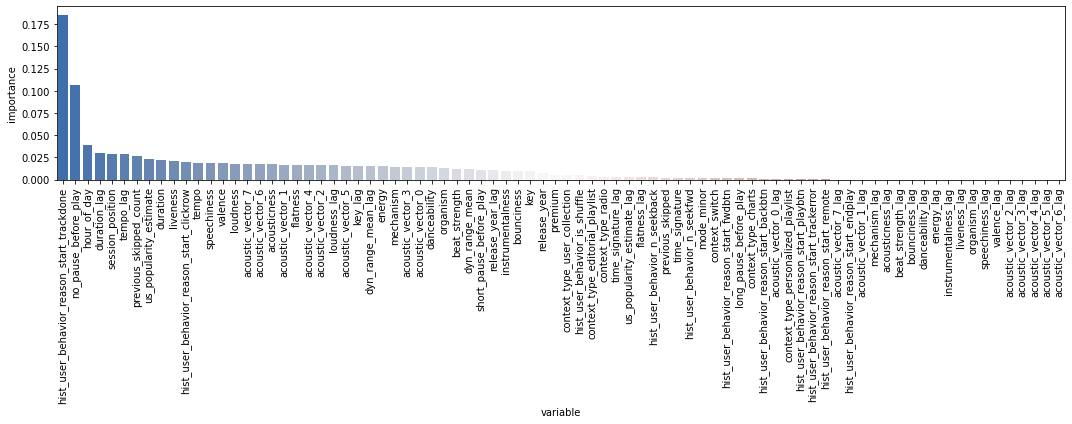

In [18]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

model = RandomForestRegressor()
model.fit(X_train, y_train)
importance = model.feature_importances_

res = list()
for k,v in zip(X_train.columns, importance):
    res.append(tuple([k,v]))

res.sort(key = lambda x: x[1], reverse=True)
res = pd.DataFrame(res, columns=["variable", "importance"])

plt.figure(figsize=(15,6))
sns.barplot(x=res["variable"], y=res["importance"], palette="vlag")
plt.xticks(rotation=90)
plt.tight_layout()


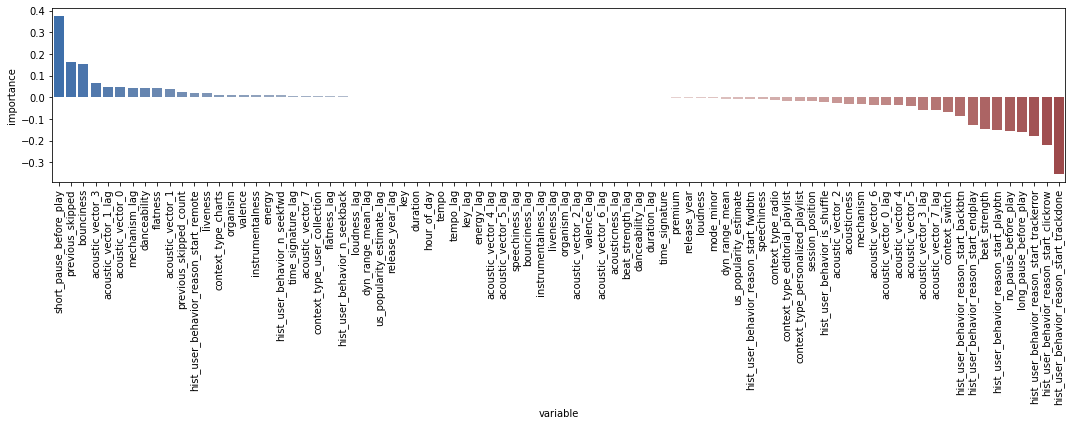

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)
importance = model.coef_

res = list()
for k,v in zip(X_train.columns, importance):
    res.append(tuple([k,v]))

res.sort(key = lambda x: x[1], reverse=True)
res = pd.DataFrame(res, columns=["variable", "importance"])

plt.figure(figsize=(15,6))
sns.barplot(x=res["variable"], y=res["importance"], palette="vlag")
plt.xticks(rotation=90)
plt.tight_layout()


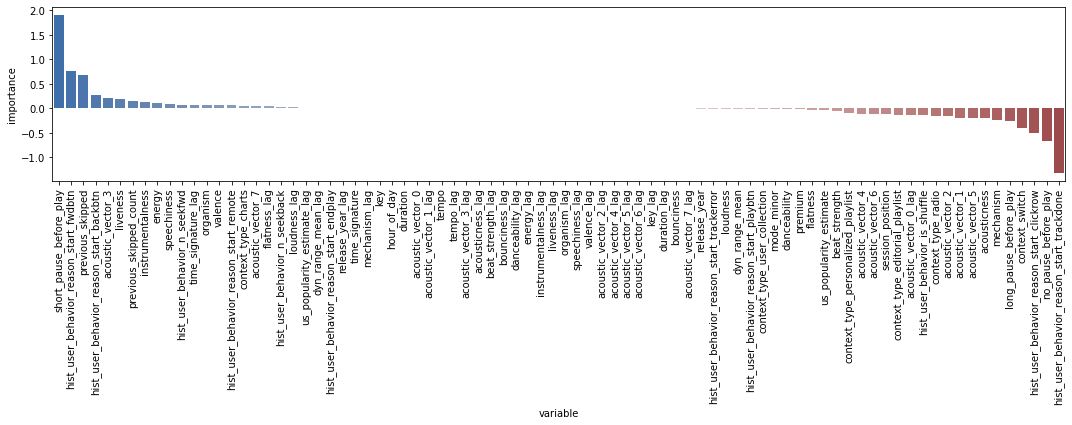

In [20]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
importance = model.coef_[0]

res = list()
for k,v in zip(X_train.columns, importance):
    res.append(tuple([k,v]))

res.sort(key = lambda x: x[1], reverse=True)
res = pd.DataFrame(res, columns=["variable", "importance"])

plt.figure(figsize=(15,6))
sns.barplot(x=res["variable"], y=res["importance"], palette="vlag")
plt.xticks(rotation=90)
plt.tight_layout()



## Model Selection
Now we will apply different models to find the best preformance. 

## Logistic Regression From Scratch

Logistic regression uses the sigmoid function, which takes an input which ranges from negative infinity to positive infinity and output a number between 0 and 1.  
The function is as follows:  
\begin{equation}
    \sigma(w^{T}x) = \frac{1}{1 + e^{-w^{T}x}}
\end{equation}

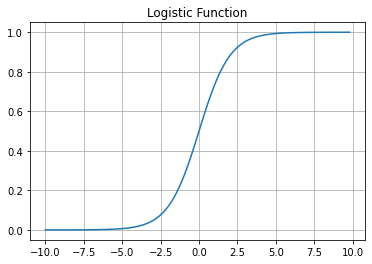

In [21]:
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.grid(True)
plt.title("Logistic Function")
plt.plot(x, sig)
plt.show()

The logistic regression model is described as follows:  

\begin{equation}
    P(y_i = 1 | x_i) = \sigma(w^{T}x_i) = \frac{1}{1 + e^{-w^{T}x_i}}
\end{equation}

In this way, we will find our optimal weight vector $w$ as follows:
\begin{equation}
    w^* = \underset{w}{\operatorname{argmin}} E(w)
\end{equation}

where $E(w)$ is the negative log-likelihood equation:
\begin{equation}
    E(w) = \sum\limits_{i=1}^{N} -y_i log(\sigma(w^{T}x_i))-(1-y_i)log(1-\sigma(w^{T}x_i)
\end{equation}

We will take the minimum of $E(w)$ by using gradient descent where alpha is the learning rate:

\begin{equation}
    w^{new} = w^{old} - \alpha\nabla_{w}E(w^{old})
\end{equation}

We can compute the partial derivative of $E(w)$ with respect to $w$ as follows:

\begin{equation}
    \frac{\partial E(w)}{\partial w_j} = \frac{1}{m} \sum\limits_{i=1}^m (\sigma(w^{T}x_i)-y_i)x^{i}_j
\end{equation}


We can now see that the $w$ vector will be updated as follows:  
\begin{equation}
    w^{j} = w^{j} - \alpha \frac{1}{m} \sum\limits_{i=1}^m (\sigma(w^{T}x_i)-y_i)x^{i}_j
\end{equation}

In [22]:
class LogisticRegressionScratch:
    
    def __init__(self, learning_rate=0.1, epochs=10):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.w = None
        
    def standardize(self, X):
        X_std = preprocessing.normalize(X, axis=0)
        return np.c_[np.ones((X_std.shape[0],1)),X_std]

    # Update function: w = w - alpha * d/dw cost
    def sigmoid(self, x):
        # Returns predicted y value for given weight vector w and feature vector x
        return 1/(1+np.e**(-x))
    
    def loss(self, X, y):
        loss = 1
        m, n = X.shape
        for i in range(m):
            x_i = np.asarray(X.iloc[i])
            x_i = np.insert(x_i, 0, 0)
            o_i = self.sigmoid(self.w, x_i)
            y_i = y.iloc[i]
            loss *= ((o_i)**y_i) * ((1-o_i)**(1-y_i))
        return loss
    
    
    def fit(self, X, y):
        # Standardize X
        X = self.standardize(X)
        # Sets weight vector w 
        m, n = X.shape
        self.w = np.zeros((n, 1))
        params = np.zeros((n, 1))
        # while not converged
        for i in range(self.epochs):
            # Update function: w = w - alpha * d/dw cost
            sig = self.sigmoid(np.dot(X, params)) - np.reshape(np.asarray(y), (len(y), 1))
            params = params - self.learning_rate * np.dot(X.T, sig)
        self.w = params
    
    def predict(self, X_test):
        # Method takes in the testing data and weight vector
        # Returns the predicted y_hat vector
        m, n = X_test.shape
        y_hat = []
        X = self.standardize(X_test)
        # Get sigmoid of X_test with weights
        z = np.dot(X, self.w)
        for i in self.sigmoid(z):
            if (i <= 0.5):
                y_i_hat = 0
            else:
                y_i_hat = 1
            y_hat.append(y_i_hat)
        return y_hat

Let's first look at how our data preforms on sklearn's built-in version of the Logistic Regression model.

In [23]:
from sklearn.linear_model import LogisticRegression
builtin_model = LogisticRegression()
builtin_model.fit(X_train, y_train)
y_hat_train = builtin_model.predict(X_train)
y_hat_test = builtin_model.predict(X_test)

c:\users\mlevy\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
builtin_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_cm(y_test, y_hat_test):
    cf_matrix = confusion_matrix(y_test, y_hat_test)

    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

The built-in logistic regression model has a training accuracy of  0.739
The built-in logistic regression model has a testing accuracy of  0.748


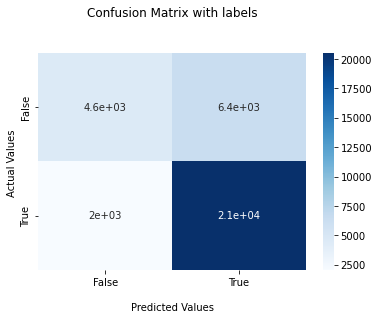

In [26]:
acc1 = accuracy_score(y_hat_train, y_train)
print("The built-in logistic regression model has a training accuracy of ", round(acc1,3))
acc2 = accuracy_score(y_hat_test, y_test)
print("The built-in logistic regression model has a testing accuracy of ", round(acc2, 3))
plot_cm(y_test, y_hat_test)

Now, let's see how our custom logistic regression model preforms.

In [27]:
model = LogisticRegressionScratch()
model.fit(X_train, y_train)

C:\Users\mlevy\AppData\Local\Temp/ipykernel_7964/3684052536.py:15: RuntimeWarning: overflow encountered in power
  return 1/(1+np.e**(-x))


The training accuracy for our custom logistic regression model is  0.668
The testing accuracy for our custom logistic regression model is  0.665


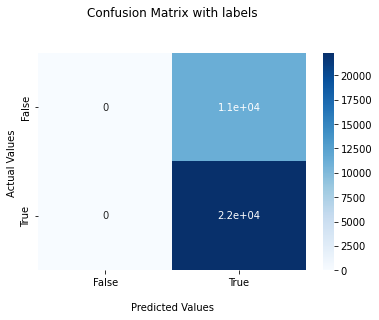

In [25]:
acc1 = accuracy_score(model.predict(X_train), y_train)
print("The training accuracy for our custom logistic regression model is ", round(acc1, 3))
y_hat_test = model.predict(X_test)
acc2 = accuracy_score(y_hat_test, y_test)
print("The testing accuracy for our custom logistic regression model is ", round(acc2, 3))
plot_cm(y_test, y_hat_test)

### Conclusion

As we would expect, our model underpreforms by a few percentage points compared to the built-in model. The most interesting thing to note here is that our model never predicts 0 for any row of data. We have trouble-shot extensively as well as trying other versions of this model found online, and conclude the same thing each time. The built-in model must be calculating the sigmoid or gradient differently (although ours is correct according to the equations). If I had more time, I would like to look into this further with different data sets to see if it is an error in the model or just something strange with our model. Like mentioned above, we implemented several versions of logistic regression, all a bit different, and still had the same results.

We can conclude that logistic regression may not be the best model for our data for this reason. Even the built-in model preforms only a few percentage points higher. We may also just have too much noise in our data and need to hone in on more important features. This is something our group would have loved to dive in deeper if we had more time.

## Random Forest and Decision Tree from Scratch

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. We will use information gain to decide when to make a split in our tree.

In [26]:
#decison tree

def entropy(y):
    n = len(y)
    unique, counts = np.unique(y, return_counts=True)
    return sum([-(i / n) * log2(i / n) for i in counts])


def weighted_entropy(y, left_idxs, right_idxs):
    return (entropy(y[left_idxs]) * len(y[left_idxs]) + entropy(y[right_idxs]) * len(y[right_idxs])) / len(y) 


class Node:
    def __init__(self, value: int = None, feature: int = None, threshold: float = None, left = None, right = None) -> None:
        self.value = value
        self.threshold = threshold
        self.feature = feature
        self.left = left
        self.right = right

    def is_leaf_node(self) -> bool:
        return self.value is not None
        
        
class DecisionTree:
    def __init__(self, max_depth: int = None, min_samples_split: int = 2, max_features = None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.root = None

    def fit(self, X, y):
        self.root = self.grow_tree(X, y, depth=0)
        

    def predict(self, X):
        if X.ndim > 1:
            return np.apply_along_axis(lambda x : self.traverse_tree(x, self.root).value, 1, X)
        else:
            return self.traverse_tree(X, self.root).value

    def grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))     

        if (self.max_depth and depth > self.max_depth) or (n_samples < self.min_samples_split) or (n_labels == 1):
            value = np.bincount(y).argmax()
            return Node(value=value)

        best_feat, best_thresh = self.best_criteria(X, y)
        
        if best_feat is not None:
            left_idxs, right_idxs = self.split(X[:,best_feat], best_thresh)
            left = self.grow_tree(X[left_idxs], y[left_idxs], depth=depth + 1)
            right = self.grow_tree(X[right_idxs], y[right_idxs], depth=depth + 1)
            return Node(feature=best_feat, threshold=best_thresh, left=left, right=right)
        else:
            value = np.bincount(y).argmax()
            return Node(value=value)
            

    def best_criteria(self, X, y):
        split_feat = None
        split_thresh = None
        split_ig = 0
        max_features = self.max_features if self.max_features is not None else X.shape[1]
        features = np.random.permutation(X.shape[1])

        i = 0
        while i < max_features or (i < X.shape[1] and split_feat is None):
            feat = features[i]
            for thresh in np.linspace(min(X[:,feat]), max(X[:,feat]), 100):
                ig = self.information_gain(y, X[:,feat], thresh)
                if ig > split_ig:
                    split_ig = ig
                    split_feat = feat
                    split_thresh = thresh
            i += 1

        return split_feat, split_thresh

    def information_gain(self, y, X_column, split_thresh):
        left_idxs, right_idxs = self.split(X_column, split_thresh)
        return entropy(y) - weighted_entropy(y, left_idxs, right_idxs)
    
    def split(self, X_column, split_thresh):
        left_idxs = np.nonzero(X_column <= split_thresh)
        right_idxs = np.nonzero(X_column > split_thresh)
        return left_idxs, right_idxs

    def traverse_tree(self, x, node, depth=0):
        if node.is_leaf_node():
            return node
        
        if x[node.feature] <= node.threshold:
            return self.traverse_tree(x, node.left, depth+1)
        else:
            return self.traverse_tree(x, node.right, depth+1)


In [27]:
def bootstrap_sample(X, y):
    m_sample_size = np.ceil(np.sqrt(len(y))).astype(int)
    sample_size = np.random.randint(m_sample_size, len(y))
    idxs = np.random.permutation(len(y))[:sample_size]
    return X[idxs], y[idxs]

class RandomForest:
    def __init__(self, n_trees: int = 100, min_samples_split: int = 2, max_depth: int = None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_trees = n_trees
        self.trees = None

    def fit(self, X, y):
        self.trees = []
        n_samples, n_features = X.shape
        m_features = np.ceil(np.sqrt(n_features)).astype(int)
        
        for _ in range(self.n_trees):
            X_bootstrap, y_bootstrap = bootstrap_sample(X, y)
            dtc = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split, max_features=m_features)
            dtc.fit(X_bootstrap, y_bootstrap)
            self.trees.append(dtc)
            
    def predict(self, X):
        predictions = np.empty([len(self.trees), X.shape[0]], dtype=int)
        for i in range(len(self.trees)):
            predictions[i] = self.trees[i].predict(X)
        return np.apply_along_axis(lambda x : np.bincount(x.astype(int)).argmax(), 0, predictions)
    


In [352]:
# dtc = RandomForest()
# dtc.fit(X_train, y_train)
# prediction = dtc.predict(X_test)

# def accuracy(y_test, y_pred):
#     return np.mean(y_test == y_pred)

# print(accuracy(y_test, prediction))

Our code from scratch is commented out due to taking too long to run. Let's try sklearn's DecisionTreeClassifier().  
We will use a max depth of 2 so the tree can be printed and easily read.

In [354]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [355]:
y = clf.predict(X_test)
accuracy_score(y, y_test)

0.8004824874910651

[Text(167.4, 181.2, 'X[79] <= 0.5\ngini = 0.444\nsamples = 134304\nvalue = [44629, 89675]'),
 Text(83.7, 108.72, 'X[74] <= 0.5\ngini = 0.308\nsamples = 90272\nvalue = [17159, 73113]'),
 Text(41.85, 36.23999999999998, 'gini = 0.262\nsamples = 76208\nvalue = [11793, 64415]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.472\nsamples = 14064\nvalue = [5366, 8698]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 0.5\ngini = 0.469\nsamples = 44032\nvalue = [27470, 16562]'),
 Text(209.25, 36.23999999999998, 'gini = 0.411\nsamples = 16905\nvalue = [4885, 12020]'),
 Text(292.95, 36.23999999999998, 'gini = 0.279\nsamples = 27127\nvalue = [22585, 4542]')]

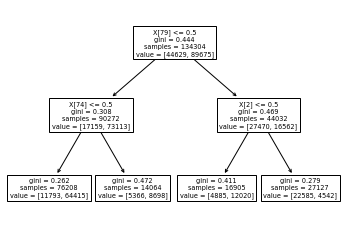

In [356]:
tree.plot_tree(clf)

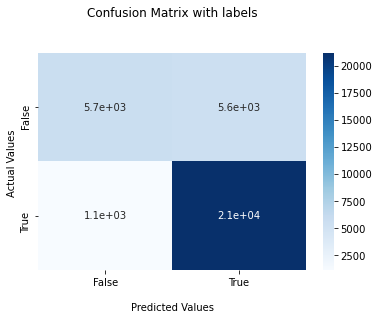

In [357]:
plot_cm(y_test, y)

This accuracy score is much better than Logistic Regression. However, building a decision tree and then random forest with such a high number of features does not make as much sense to us. We think we should try other models that can handel a large feature space well.

## Support Vector Machine from Scratch

**-----------------COMMENTED OUT DUE TO MALLOC ERROR------------------**

#### Kernels

In [29]:
# def lin_kernel(X, z):
#     Xy = X * y[:,np.newaxis]
#     return np.matmul(Xy, Xy.T)

In [30]:
# def poly_kernel(X, z, degree):
#     return (1 + lin_kernel(X, z))**degree

In [31]:
# def rbf_kernel(X, z, gamma):
#     return np.exp(-gamma*np.sum((z - X)**2))

#### SVM

In [32]:
# class SVM:
#     def __init__(self, C, kernel_type, max_iter=100, degree=None, gamma=None):
#         self.C = C
#         self.kernel_type = kernel_type
#         self.kernels = {
#             'linear': lin_kernel,
#             'polynomial': poly_kernel,
#             'rbf': rbf_kernel
#         }
#         self.kernel = self.kernels[kernel_type]
        
#         self.max_iter = max_iter
#         self.degree = degree
#         self.gamma = gamma
#         self.alpha = None
        
#         self.w = None
#         self.b = 0
        
#         self.support_vectors = None
#         self.support_labels = None
#         self.intercept = None
        
#         self.X = None
#         self.y = None
        
#     def fit(self, X, y):
#         self.X = X
#         self.y = y.replace(0,-1)
#         m,n = X.shape
#         if not self.gamma:
#             self.gamma = (1 / n)
        
#         Gram_HXy = self.generate_gram_matrix(X, y)
        
#         A = np.vstack((-np.eye(m), np.eye(m)))
#         b = np.hstack((np.zeros(m), self.C * np.ones(m)))
#         constraints = ({'type': 'eq',   'fun': lambda a: np.dot(a, y), 'jac': lambda a: y},
#                        {'type': 'ineq', 'fun': lambda a: b - np.dot(A, a), 'jac': lambda a: -A})
#         optimal = minimize(fun=lambda a: self.loss(a, Gram_HXy),
#                            x0=np.ones(len(y)),
#                            method='SLSQP',
#                            jac=lambda a: self.jacobian(a, Gram_HXy),
#                            constraints=constraints)
#         self.alpha = optimal.x
#         self.w = np.sum((self.alpha[:, np.newaxis] * Xy), axis=0)
        
#         epsilon = 1e-6
#         self.support_vectors = self.support_vects(X, epsilon)
        
#         distances = np.matmul(self.support_vectors, self.w)
#         min_dist = np.argmin(distances)
        
#         support_labels = y[self.alpha > epsilon]
#         self.intercept = support_labels[min_dist] - distances[min_dist]
        
#     def generate_gram_matrix(self, X, y):
        
#         def lin_gram_mat(X,y):
#             kmat = X * np.array(y)[:,np.newaxis]
#             return kmat
#         def poly_gram_mat(X):
#             kmat = np.apply_along_axis(lambda x1: np.apply_along_axis(lambda x2: self.kernel(x1, x2, self.degree), 1, X), 1, X)
#             return kmat
#         def rbf_gram_mat(X):
#             kmat = np.apply_along_axis(lambda x1: np.apply_along_axis(lambda x2: self.kernel(x1, x2, self.gamma), 1, X), 1, X)
#             return kmat
        
#         if self.kernel_type == 'linear':
#             kmat = lin_gram_mat(X,y)
#             Gram_Hxy = np.matmul(kmat, kmat.T)
#         elif self.kernel_type == 'polynomial':
#             kmat = poly_gram_mat(X)
#             Gram_Hxy = kmat * np.matmul(y, y.T)
#         else:
#             kmat = rbf_gram_mat(X)
#             Gram_Hxy = kmat * np.matmul(y, y.T)
        
#         return Gram_Hxy
    
    
#     # Bias and weight vector methods
#     def calculate_bias(self, X, y, w):
#         return np.mean((y - np.dot(w.T, X.T)))
#     def calculate_weights(self, X, y, alpha):
#         return np.dot(alpha * y, X)
    
#     # Methods to assist in scipy minimization optimization
#     def loss_func(self, alphas, H):
#         return (0.5 * alphas.dot(alphas.dot(H)) - np.sum(alphas))
#     def jacobian(self, alphas, H):
#         return alphas.dot(H) - np.ones(len(alphas)) 
#     def support_vects(self, X, epsilon):
#         return X[self.alpha > epsilon]
    
#     # Method to predict the labels of the data
#     def predict(self, X):
#         if self.kernel_type == 'linear':
#             if self.w and self.w.shape[0] == X.shape[1]:
#                 return (2 * (np.matmul(X, self.w) > 0) - 1)
#             else:
#                 return None
        
#         def predict1(x):
#             x1 = np.apply_along_axis(lambda s: self.kernel(x, s, self.gamma), 1, self.support_vectors)
#             x2 = x1 * self.support_labels
#             return np.sum(x2)
        
#         d = np.apply_along_axis(predict1, 1, X)
#         return 2 * (d > 0) - 1

#### Visualization Methods

In [33]:
# def plotLine(ax, xRange, w, x0, label, color='grey', linestyle='-', alpha=1.):
#     """ Plot a (separating) line given the normal vector (weights) and point of intercept """
#     if type(x0) == int or type(x0) == float or type(x0) == np.float64:
#         x0 = [0, -x0 / w[1]]
#     yy = -(w[0] / w[1]) * (xRange - x0[0]) + x0[1]
#     ax.plot(xRange, yy, color=color, label=label, linestyle=linestyle)
    
# def plotSvm(X, y, support=None, w=None, intercept=0., label='Data', separatorLabel='Separator', 
#             ax=None, bound=[[-1.1, 1.1], [-1.1, 1.1]]):
#     """ Plot the SVM separation, and margin """
#     if ax is None:
#         fig, ax = plt.subplots(1)
    
#     im = ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, alpha=0.5, label=label)
#     if support is not None:
#         ax.scatter(support[:,0], support[:,1], label='Support', s=80, facecolors='none', 
#                    edgecolors='y', color='y')
#         print("Number of support vectors = %d" % (len(support)))
#     if w is not None:
#         xx = np.array(bound[0])
#         plotLine(ax, xx, w, intercept, separatorLabel)
#         # Plot margin
#         if support is not None:
#             signedDist = np.matmul(support, w)
#             margin = np.max(signedDist) - np.min(signedDist) * np.sqrt(np.dot(w, w))
#             supportMaxNeg = support[np.argmin(signedDist)]
#             plotLine(ax, xx, w, supportMaxNeg, 'Margin -', linestyle='-.', alpha=0.8)
#             supportMaxPos = support[np.argmax(signedDist)]
#             plotLine(ax, xx, w, supportMaxPos, 'Margin +', linestyle='--', alpha=0.8)
#             ax.set_title('Margin = %.3f' % (margin))
#     ax.legend(loc='upper left')
#     ax.grid()
#     ax.set_xlim(bound[0])
#     ax.set_ylim(bound[1])
#     cb = plt.colorbar(im, ax=ax)
#     loc = np.arange(-1,1,1)
#     cb.set_ticks(loc)
#     cb.set_ticklabels(['-1','1'])

## Built-In Model Implementations

#### XGBClassifier

The training accuracy for our XGBClassifier model is  0.831
The testing accuracy for our XGBClassifier is  0.806


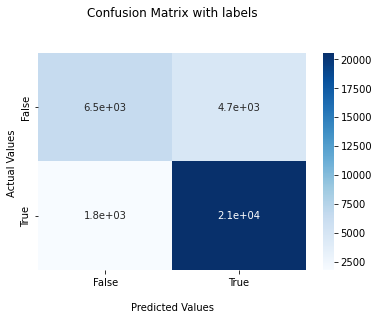

In [34]:
! pip install xgboost
from xgboost import XGBClassifier
clf_xgb = XGBClassifier(random_state=42).fit(X_train,y_train)

acc1 = accuracy_score(clf_xgb.predict(X_train), y_train)
print("The training accuracy for our XGBClassifier model is ", round(acc1, 3))
y_hat_test = clf_xgb.predict(X_test)
acc2 = accuracy_score(y_hat_test, y_test)
print("The testing accuracy for our XGBClassifier is ", round(acc2, 3))
plot_cm(y_test, y_hat_test)

#### Light GBM Classifier

The training accuracy for our LGBMClassifier is  0.813
The testing accuracy for our LGBMClassifier is  0.813


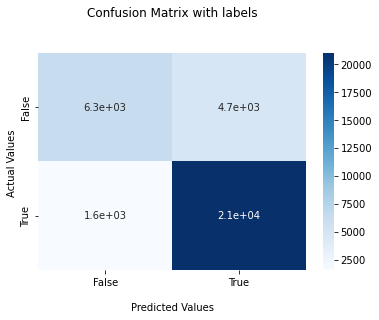

In [31]:
! pip install lightgbm
from lightgbm import LGBMClassifier
clf_lgbm = LGBMClassifier().fit(X_train, y_train)

acc1 = accuracy_score(clf_lgbm.predict(X_train), y_train)
print("The training accuracy for our LGBMClassifier is ", round(acc1, 3))
y_hat_test = clf_lgbm.predict(X_test)
acc2 = accuracy_score(y_hat_test, y_test)
print("The testing accuracy for our LGBMClassifier is ", round(acc2, 3))
plot_cm(y_test, y_hat_test)

#### K-Nearest Neighbors Classifier

The training accuracy for our KNeighborsClassifier model is  0.752
The testing accuracy for our KNeighborsClassifier model is  0.632


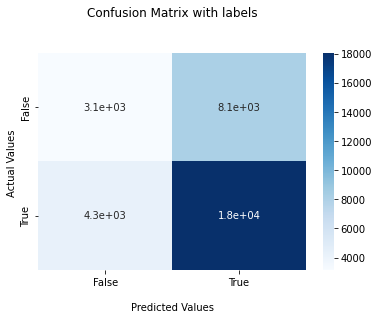

In [36]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

acc1 = accuracy_score(clf_knn.predict(X_train), y_train)
print("The training accuracy for our KNeighborsClassifier model is ", round(acc1, 3))
y_hat_test = clf_knn.predict(X_test)
acc2 = accuracy_score(y_hat_test, y_test)
print("The testing accuracy for our KNeighborsClassifier model is ", round(acc2, 3))
plot_cm(y_test, y_hat_test)

#### CatBoost Classsifier

Learning rate set to 0.083489
0:	learn: 0.6541023	total: 253ms	remaining: 4m 13s
1:	learn: 0.6220115	total: 309ms	remaining: 2m 33s
2:	learn: 0.5957566	total: 362ms	remaining: 2m
3:	learn: 0.5744585	total: 421ms	remaining: 1m 44s
4:	learn: 0.5562805	total: 490ms	remaining: 1m 37s
5:	learn: 0.5416662	total: 550ms	remaining: 1m 31s
6:	learn: 0.5295837	total: 604ms	remaining: 1m 25s
7:	learn: 0.5191528	total: 660ms	remaining: 1m 21s
8:	learn: 0.5103943	total: 729ms	remaining: 1m 20s
9:	learn: 0.5032892	total: 801ms	remaining: 1m 19s
10:	learn: 0.4975515	total: 864ms	remaining: 1m 17s
11:	learn: 0.4925262	total: 925ms	remaining: 1m 16s
12:	learn: 0.4883641	total: 1.02s	remaining: 1m 17s
13:	learn: 0.4851307	total: 1.1s	remaining: 1m 17s
14:	learn: 0.4816554	total: 1.17s	remaining: 1m 16s
15:	learn: 0.4787253	total: 1.22s	remaining: 1m 15s
16:	learn: 0.4767379	total: 1.29s	remaining: 1m 14s
17:	learn: 0.4748948	total: 1.35s	remaining: 1m 13s
18:	learn: 0.4732472	total: 1.42s	remaining: 1m 1

104:	learn: 0.4487518	total: 6.79s	remaining: 57.9s
105:	learn: 0.4487012	total: 6.84s	remaining: 57.7s
106:	learn: 0.4486146	total: 6.9s	remaining: 57.6s
107:	learn: 0.4485463	total: 6.95s	remaining: 57.4s
108:	learn: 0.4484303	total: 7.02s	remaining: 57.4s
109:	learn: 0.4483661	total: 7.07s	remaining: 57.2s
110:	learn: 0.4482949	total: 7.13s	remaining: 57.1s
111:	learn: 0.4482465	total: 7.18s	remaining: 56.9s
112:	learn: 0.4481515	total: 7.24s	remaining: 56.8s
113:	learn: 0.4480844	total: 7.29s	remaining: 56.6s
114:	learn: 0.4479571	total: 7.34s	remaining: 56.5s
115:	learn: 0.4478603	total: 7.4s	remaining: 56.4s
116:	learn: 0.4477084	total: 7.44s	remaining: 56.2s
117:	learn: 0.4476214	total: 7.51s	remaining: 56.1s
118:	learn: 0.4475531	total: 7.56s	remaining: 56s
119:	learn: 0.4474972	total: 7.62s	remaining: 55.9s
120:	learn: 0.4474299	total: 7.67s	remaining: 55.7s
121:	learn: 0.4473889	total: 7.73s	remaining: 55.7s
122:	learn: 0.4472803	total: 7.79s	remaining: 55.6s
123:	learn: 0.44

265:	learn: 0.4359183	total: 18.3s	remaining: 50.4s
266:	learn: 0.4358524	total: 18.3s	remaining: 50.4s
267:	learn: 0.4357913	total: 18.4s	remaining: 50.3s
268:	learn: 0.4357133	total: 18.5s	remaining: 50.4s
269:	learn: 0.4356657	total: 18.6s	remaining: 50.3s
270:	learn: 0.4355781	total: 18.7s	remaining: 50.2s
271:	learn: 0.4355235	total: 18.7s	remaining: 50.1s
272:	learn: 0.4354461	total: 18.9s	remaining: 50.2s
273:	learn: 0.4353215	total: 18.9s	remaining: 50.1s
274:	learn: 0.4352597	total: 19s	remaining: 50s
275:	learn: 0.4351978	total: 19s	remaining: 49.9s
276:	learn: 0.4351153	total: 19.1s	remaining: 49.8s
277:	learn: 0.4350568	total: 19.2s	remaining: 49.8s
278:	learn: 0.4349964	total: 19.2s	remaining: 49.6s
279:	learn: 0.4349355	total: 19.3s	remaining: 49.5s
280:	learn: 0.4349264	total: 19.3s	remaining: 49.4s
281:	learn: 0.4348505	total: 19.4s	remaining: 49.3s
282:	learn: 0.4347974	total: 19.4s	remaining: 49.2s
283:	learn: 0.4347226	total: 19.5s	remaining: 49.1s
284:	learn: 0.4346

425:	learn: 0.4257205	total: 29.3s	remaining: 39.4s
426:	learn: 0.4256800	total: 29.3s	remaining: 39.3s
427:	learn: 0.4256328	total: 29.4s	remaining: 39.2s
428:	learn: 0.4255620	total: 29.4s	remaining: 39.2s
429:	learn: 0.4254868	total: 29.5s	remaining: 39.1s
430:	learn: 0.4254259	total: 29.5s	remaining: 39s
431:	learn: 0.4253673	total: 29.6s	remaining: 38.9s
432:	learn: 0.4253160	total: 29.7s	remaining: 38.8s
433:	learn: 0.4252635	total: 29.7s	remaining: 38.8s
434:	learn: 0.4252053	total: 29.8s	remaining: 38.7s
435:	learn: 0.4251627	total: 29.8s	remaining: 38.6s
436:	learn: 0.4251060	total: 29.9s	remaining: 38.5s
437:	learn: 0.4250376	total: 29.9s	remaining: 38.4s
438:	learn: 0.4249766	total: 30s	remaining: 38.3s
439:	learn: 0.4249293	total: 30.1s	remaining: 38.3s
440:	learn: 0.4248836	total: 30.1s	remaining: 38.2s
441:	learn: 0.4248405	total: 30.2s	remaining: 38.1s
442:	learn: 0.4247762	total: 30.2s	remaining: 38s
443:	learn: 0.4247197	total: 30.3s	remaining: 37.9s
444:	learn: 0.4246

584:	learn: 0.4169359	total: 40.7s	remaining: 28.9s
585:	learn: 0.4168879	total: 40.8s	remaining: 28.8s
586:	learn: 0.4168421	total: 40.8s	remaining: 28.7s
587:	learn: 0.4167883	total: 40.9s	remaining: 28.7s
588:	learn: 0.4167112	total: 41s	remaining: 28.6s
589:	learn: 0.4166515	total: 41s	remaining: 28.5s
590:	learn: 0.4165884	total: 41.1s	remaining: 28.4s
591:	learn: 0.4165338	total: 41.1s	remaining: 28.4s
592:	learn: 0.4164765	total: 41.2s	remaining: 28.3s
593:	learn: 0.4164174	total: 41.2s	remaining: 28.2s
594:	learn: 0.4163610	total: 41.3s	remaining: 28.1s
595:	learn: 0.4163465	total: 41.4s	remaining: 28s
596:	learn: 0.4162982	total: 41.4s	remaining: 28s
597:	learn: 0.4162498	total: 41.5s	remaining: 27.9s
598:	learn: 0.4161800	total: 41.5s	remaining: 27.8s
599:	learn: 0.4161243	total: 41.6s	remaining: 27.7s
600:	learn: 0.4160663	total: 41.6s	remaining: 27.6s
601:	learn: 0.4160181	total: 41.7s	remaining: 27.6s
602:	learn: 0.4159409	total: 41.7s	remaining: 27.5s
603:	learn: 0.415877

745:	learn: 0.4086268	total: 52.2s	remaining: 17.8s
746:	learn: 0.4085710	total: 52.2s	remaining: 17.7s
747:	learn: 0.4085306	total: 52.3s	remaining: 17.6s
748:	learn: 0.4084809	total: 52.3s	remaining: 17.5s
749:	learn: 0.4084180	total: 52.4s	remaining: 17.5s
750:	learn: 0.4083750	total: 52.5s	remaining: 17.4s
751:	learn: 0.4083225	total: 52.5s	remaining: 17.3s
752:	learn: 0.4082778	total: 52.6s	remaining: 17.2s
753:	learn: 0.4082384	total: 52.6s	remaining: 17.2s
754:	learn: 0.4081751	total: 52.7s	remaining: 17.1s
755:	learn: 0.4081093	total: 52.8s	remaining: 17s
756:	learn: 0.4080593	total: 52.8s	remaining: 17s
757:	learn: 0.4080203	total: 52.9s	remaining: 16.9s
758:	learn: 0.4079858	total: 52.9s	remaining: 16.8s
759:	learn: 0.4079280	total: 53s	remaining: 16.7s
760:	learn: 0.4078917	total: 53.1s	remaining: 16.7s
761:	learn: 0.4078538	total: 53.1s	remaining: 16.6s
762:	learn: 0.4078138	total: 53.2s	remaining: 16.5s
763:	learn: 0.4077673	total: 53.2s	remaining: 16.4s
764:	learn: 0.4077

908:	learn: 0.4008209	total: 1m 2s	remaining: 6.23s
909:	learn: 0.4007803	total: 1m 2s	remaining: 6.16s
910:	learn: 0.4007276	total: 1m 2s	remaining: 6.09s
911:	learn: 0.4006775	total: 1m 2s	remaining: 6.02s
912:	learn: 0.4006395	total: 1m 2s	remaining: 5.95s
913:	learn: 0.4005839	total: 1m 2s	remaining: 5.88s
914:	learn: 0.4005352	total: 1m 2s	remaining: 5.81s
915:	learn: 0.4004823	total: 1m 2s	remaining: 5.74s
916:	learn: 0.4004394	total: 1m 2s	remaining: 5.67s
917:	learn: 0.4003929	total: 1m 2s	remaining: 5.6s
918:	learn: 0.4003572	total: 1m 2s	remaining: 5.54s
919:	learn: 0.4003056	total: 1m 2s	remaining: 5.47s
920:	learn: 0.4002657	total: 1m 2s	remaining: 5.4s
921:	learn: 0.4002156	total: 1m 3s	remaining: 5.33s
922:	learn: 0.4001649	total: 1m 3s	remaining: 5.26s
923:	learn: 0.4001112	total: 1m 3s	remaining: 5.19s
924:	learn: 0.4000795	total: 1m 3s	remaining: 5.12s
925:	learn: 0.4000234	total: 1m 3s	remaining: 5.05s
926:	learn: 0.3999717	total: 1m 3s	remaining: 4.98s
927:	learn: 0.

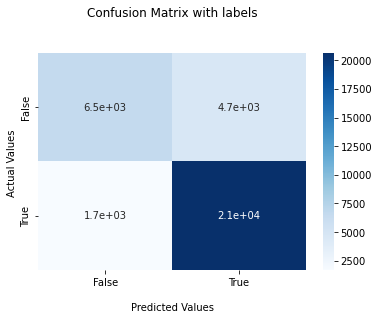

In [37]:
! pip install catboost
from catboost import CatBoostClassifier
clf_cb = CatBoostClassifier().fit(X_train,y_train)

acc1 = accuracy_score(clf_cb.predict(X_train), y_train)
print("The training accuracy for our CatBoostClassifier model is ", round(acc1, 3))
y_hat_test = clf_cb.predict(X_test)
acc2 = accuracy_score(y_hat_test, y_test)
print("The testing accuracy for our CatBoostClassifier model is ", round(acc2, 3))
plot_cm(y_test, y_hat_test)

#### GradientBoost Classifier

The training accuracy for our GradientBoostingClassifier model is  0.807
The testing accuracy for our GradientBoostingClassifier model is  0.807


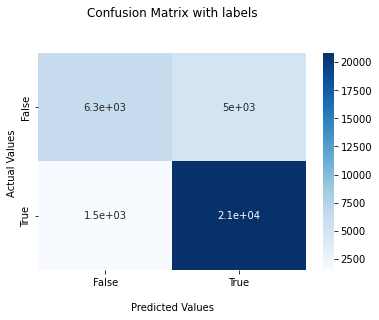

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gbc = GradientBoostingClassifier().fit(X_train,y_train)

acc1 = accuracy_score(clf_gbc.predict(X_train), y_train)
print("The training accuracy for our GradientBoostingClassifier model is ", round(acc1, 3))
y_hat_test = clf_gbc.predict(X_test)
acc2 = accuracy_score(y_hat_test, y_test)
print("The testing accuracy for our GradientBoostingClassifier model is ", round(acc2, 3))
plot_cm(y_test, y_hat_test)

#### LinearSVC Classifier

c:\users\mlevy\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The training accuracy for our LinearSVC model is  0.803
The testing accuracy for our LinearSVC model is  0.803


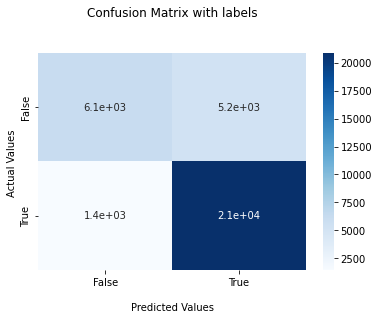

In [39]:
from sklearn.svm import LinearSVC
clf_linsvc = LinearSVC().fit(X_train,y_train)

acc1 = accuracy_score(clf_linsvc.predict(X_train), y_train)
print("The training accuracy for our LinearSVC model is ", round(acc1, 3))
y_hat_test = clf_linsvc.predict(X_test)
acc2 = accuracy_score(y_hat_test, y_test)
print("The testing accuracy for our LinearSVC model is ", round(acc2, 3))
plot_cm(y_test, y_hat_test)

## Hyperparameter Tuning of Best Model

#### XGBClassifier

In [44]:
from sklearn.model_selection import GridSearchCV

In [37]:
params = {'n_estimators': [100,200],
          'max_depth': [3,5,10],
          'learning_rate': [0.05,0.1,0.3],
          'gamma': [0,0.1,0.2]}


gsearch = GridSearchCV(estimator=XGBClassifier(random_state=42),param_grid=params)
gsearch.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                       

Best Training Score and Best Parameters

In [44]:
gsearch.best_score_

0.807295427553831

In [43]:
gsearch.best_params_

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [59]:
gsearch.score(X_train,y_train)

0.8160665356206814

Score with tuned parameters

The training accuracy for our custom logistic regression model is  0.817
The testing accuracy for our custom logistic regression model is  0.808


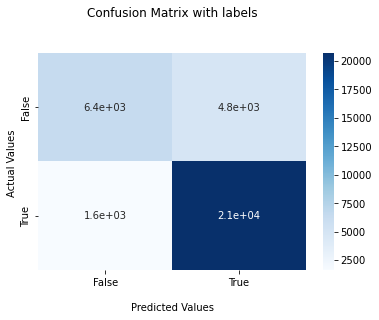

In [42]:
tuned_xgb = XGBClassifier(gamma=0,learning_rate=0.1,max_depth=5,n_estimators=200)
tuned_xgb.fit(X_train,y_train)

acc1 = accuracy_score(tuned_xgb.predict(X_train), y_train)
print("The training accuracy for our custom logistic regression model is ", round(acc1, 3))
y_hat_test = tuned_xgb.predict(X_test)
acc2 = accuracy_score(y_hat_test, y_test)
print("The testing accuracy for our custom logistic regression model is ", round(acc2, 3))
plot_cm(y_test, y_hat_test)

#### LightGBM Classifier

In [45]:
params2 = {'num_leaves':[31,50],
           'learning_rate':[0.05,0.1,0.2],
           'n_estimators':[100,200]}

gsearch2 = GridSearchCV(estimator=LGBMClassifier(random_state=42),param_grid=params2)
gsearch2.fit(X_train,y_train)

GridSearchCV(estimator=LGBMClassifier(random_state=42),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'n_estimators': [100, 200], 'num_leaves': [31, 50]})

Best Training Score and Best Parameters

In [46]:
gsearch2.best_score_

0.8085760597641707

In [47]:
gsearch2.best_params_

{'learning_rate': 0.05, 'n_estimators': 200, 'num_leaves': 50}

In [48]:
gsearch2.score(X_train,y_train)

0.8191639861806052

In [50]:
gsearch2.score(X_test,y_test)

0.8081069811770312

Scores with tuned parameters

The training accuracy for our tuned LGBM model is  0.819
The testing accuracy for our tuned LGBM model is  0.808


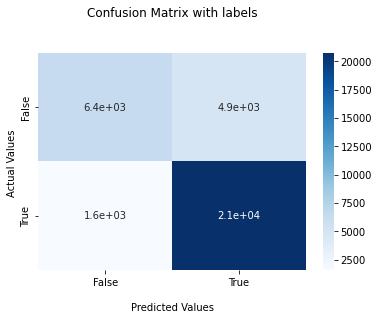

In [55]:
tuned_lgbm = LGBMClassifier(learning_rate=0.05,n_estimators=200,num_leaves=50)
tuned_lgbm.fit(X_train,y_train)

acc1 = accuracy_score(tuned_lgbm.predict(X_train), y_train)
print("The training accuracy for our tuned LGBM model is ", round(acc1, 3))
y_hat_test = tuned_lgbm.predict(X_test)
acc2 = accuracy_score(y_hat_test, y_test)
print("The testing accuracy for our tuned LGBM model is ", round(acc2, 3))
plot_cm(y_test, y_hat_test)

In [56]:
params3 = {'max_depth':[6,8,10],
           'learning_rate':[0.05,0.1,0.2],
           'n_estimators':[100,200]}

gsearch3 = GridSearchCV(estimator=CatBoostClassifier(random_state=42),param_grid=params2)
gsearch3.fit(X_train,y_train)

0:	learn: 0.6696198	total: 57.4ms	remaining: 5.68s
1:	learn: 0.6485964	total: 101ms	remaining: 4.93s
2:	learn: 0.6301836	total: 140ms	remaining: 4.53s
3:	learn: 0.6135571	total: 183ms	remaining: 4.4s
4:	learn: 0.5986380	total: 233ms	remaining: 4.43s
5:	learn: 0.5853747	total: 285ms	remaining: 4.46s
6:	learn: 0.5741307	total: 320ms	remaining: 4.25s
7:	learn: 0.5635295	total: 520ms	remaining: 5.97s
8:	learn: 0.5543053	total: 701ms	remaining: 7.09s
9:	learn: 0.5460800	total: 889ms	remaining: 8s
10:	learn: 0.5385475	total: 988ms	remaining: 7.99s
11:	learn: 0.5319682	total: 1.05s	remaining: 7.71s
12:	learn: 0.5262100	total: 1.13s	remaining: 7.55s
13:	learn: 0.5203376	total: 1.21s	remaining: 7.43s
14:	learn: 0.5146963	total: 1.29s	remaining: 7.29s
15:	learn: 0.5103876	total: 1.34s	remaining: 7.02s
16:	learn: 0.5060758	total: 1.4s	remaining: 6.81s
17:	learn: 0.5024450	total: 1.44s	remaining: 6.57s
18:	learn: 0.4995301	total: 1.51s	remaining: 6.44s
19:	learn: 0.4966443	total: 1.57s	remaining: 

65:	learn: 0.4590920	total: 3.43s	remaining: 1.77s
66:	learn: 0.4588391	total: 3.49s	remaining: 1.72s
67:	learn: 0.4586498	total: 3.53s	remaining: 1.66s
68:	learn: 0.4585111	total: 3.58s	remaining: 1.61s
69:	learn: 0.4584009	total: 3.66s	remaining: 1.57s
70:	learn: 0.4581555	total: 3.71s	remaining: 1.52s
71:	learn: 0.4579584	total: 3.76s	remaining: 1.46s
72:	learn: 0.4578098	total: 3.8s	remaining: 1.41s
73:	learn: 0.4576047	total: 3.87s	remaining: 1.36s
74:	learn: 0.4575083	total: 3.95s	remaining: 1.32s
75:	learn: 0.4572804	total: 4s	remaining: 1.26s
76:	learn: 0.4571269	total: 4.04s	remaining: 1.21s
77:	learn: 0.4569635	total: 4.1s	remaining: 1.16s
78:	learn: 0.4568657	total: 4.15s	remaining: 1.1s
79:	learn: 0.4567089	total: 4.2s	remaining: 1.05s
80:	learn: 0.4565236	total: 4.25s	remaining: 997ms
81:	learn: 0.4563646	total: 4.3s	remaining: 945ms
82:	learn: 0.4562405	total: 4.36s	remaining: 893ms
83:	learn: 0.4561244	total: 4.41s	remaining: 841ms
84:	learn: 0.4560169	total: 4.46s	remai

28:	learn: 0.4779041	total: 1.63s	remaining: 4s
29:	learn: 0.4768591	total: 1.69s	remaining: 3.94s
30:	learn: 0.4754977	total: 1.74s	remaining: 3.88s
31:	learn: 0.4744752	total: 1.8s	remaining: 3.83s
32:	learn: 0.4734281	total: 1.87s	remaining: 3.79s
33:	learn: 0.4726725	total: 1.92s	remaining: 3.73s
34:	learn: 0.4719710	total: 1.97s	remaining: 3.66s
35:	learn: 0.4713018	total: 2.04s	remaining: 3.63s
36:	learn: 0.4706621	total: 2.1s	remaining: 3.58s
37:	learn: 0.4700912	total: 2.17s	remaining: 3.53s
38:	learn: 0.4693033	total: 2.22s	remaining: 3.47s
39:	learn: 0.4687633	total: 2.27s	remaining: 3.4s
40:	learn: 0.4681746	total: 2.32s	remaining: 3.33s
41:	learn: 0.4674744	total: 2.37s	remaining: 3.28s
42:	learn: 0.4670727	total: 2.42s	remaining: 3.21s
43:	learn: 0.4665250	total: 2.47s	remaining: 3.15s
44:	learn: 0.4661553	total: 2.52s	remaining: 3.08s
45:	learn: 0.4656463	total: 2.57s	remaining: 3.02s
46:	learn: 0.4651521	total: 2.61s	remaining: 2.94s
47:	learn: 0.4646816	total: 2.67s	rem

90:	learn: 0.4549990	total: 5.02s	remaining: 497ms
91:	learn: 0.4549384	total: 5.07s	remaining: 441ms
92:	learn: 0.4548213	total: 5.12s	remaining: 385ms
93:	learn: 0.4545944	total: 5.16s	remaining: 330ms
94:	learn: 0.4545023	total: 5.21s	remaining: 274ms
95:	learn: 0.4543887	total: 5.26s	remaining: 219ms
96:	learn: 0.4542053	total: 5.31s	remaining: 164ms
97:	learn: 0.4541121	total: 5.36s	remaining: 109ms
98:	learn: 0.4540028	total: 5.4s	remaining: 54.6ms
99:	learn: 0.4539383	total: 5.45s	remaining: 0us
0:	learn: 0.6696198	total: 133ms	remaining: 26.5s
1:	learn: 0.6485964	total: 246ms	remaining: 24.3s
2:	learn: 0.6301836	total: 315ms	remaining: 20.7s
3:	learn: 0.6135571	total: 406ms	remaining: 19.9s
4:	learn: 0.5986380	total: 484ms	remaining: 18.9s
5:	learn: 0.5853747	total: 563ms	remaining: 18.2s
6:	learn: 0.5741307	total: 607ms	remaining: 16.7s
7:	learn: 0.5635295	total: 676ms	remaining: 16.2s
8:	learn: 0.5543053	total: 755ms	remaining: 16s
9:	learn: 0.5460800	total: 811ms	remaining: 

152:	learn: 0.4508344	total: 8.42s	remaining: 2.58s
153:	learn: 0.4507616	total: 8.47s	remaining: 2.53s
154:	learn: 0.4506849	total: 8.51s	remaining: 2.47s
155:	learn: 0.4506349	total: 8.56s	remaining: 2.41s
156:	learn: 0.4505717	total: 8.6s	remaining: 2.36s
157:	learn: 0.4505287	total: 8.66s	remaining: 2.3s
158:	learn: 0.4504741	total: 8.7s	remaining: 2.24s
159:	learn: 0.4504049	total: 8.76s	remaining: 2.19s
160:	learn: 0.4503748	total: 8.8s	remaining: 2.13s
161:	learn: 0.4503164	total: 8.85s	remaining: 2.08s
162:	learn: 0.4502679	total: 8.9s	remaining: 2.02s
163:	learn: 0.4501917	total: 8.94s	remaining: 1.96s
164:	learn: 0.4501071	total: 8.99s	remaining: 1.91s
165:	learn: 0.4500458	total: 9.03s	remaining: 1.85s
166:	learn: 0.4500023	total: 9.08s	remaining: 1.79s
167:	learn: 0.4499602	total: 9.13s	remaining: 1.74s
168:	learn: 0.4498902	total: 9.19s	remaining: 1.69s
169:	learn: 0.4498410	total: 9.22s	remaining: 1.63s
170:	learn: 0.4497844	total: 9.27s	remaining: 1.57s
171:	learn: 0.449

113:	learn: 0.4531166	total: 6s	remaining: 4.53s
114:	learn: 0.4530293	total: 6.05s	remaining: 4.47s
115:	learn: 0.4529308	total: 6.1s	remaining: 4.42s
116:	learn: 0.4528720	total: 6.14s	remaining: 4.36s
117:	learn: 0.4528215	total: 6.19s	remaining: 4.3s
118:	learn: 0.4527041	total: 6.24s	remaining: 4.25s
119:	learn: 0.4526155	total: 6.29s	remaining: 4.19s
120:	learn: 0.4524951	total: 6.34s	remaining: 4.14s
121:	learn: 0.4523732	total: 6.38s	remaining: 4.08s
122:	learn: 0.4522614	total: 6.42s	remaining: 4.02s
123:	learn: 0.4521851	total: 6.48s	remaining: 3.97s
124:	learn: 0.4521298	total: 6.55s	remaining: 3.93s
125:	learn: 0.4520584	total: 6.61s	remaining: 3.88s
126:	learn: 0.4519419	total: 6.65s	remaining: 3.82s
127:	learn: 0.4518666	total: 6.7s	remaining: 3.77s
128:	learn: 0.4517432	total: 6.75s	remaining: 3.71s
129:	learn: 0.4516393	total: 6.8s	remaining: 3.66s
130:	learn: 0.4515875	total: 6.85s	remaining: 3.6s
131:	learn: 0.4515184	total: 6.91s	remaining: 3.56s
132:	learn: 0.451417

75:	learn: 0.4562786	total: 4.14s	remaining: 6.76s
76:	learn: 0.4561070	total: 4.2s	remaining: 6.7s
77:	learn: 0.4560302	total: 4.25s	remaining: 6.65s
78:	learn: 0.4558659	total: 4.3s	remaining: 6.59s
79:	learn: 0.4557052	total: 4.35s	remaining: 6.53s
80:	learn: 0.4555652	total: 4.41s	remaining: 6.48s
81:	learn: 0.4554668	total: 4.47s	remaining: 6.43s
82:	learn: 0.4553758	total: 4.52s	remaining: 6.37s
83:	learn: 0.4552067	total: 4.59s	remaining: 6.33s
84:	learn: 0.4550960	total: 4.65s	remaining: 6.29s
85:	learn: 0.4549083	total: 4.72s	remaining: 6.25s
86:	learn: 0.4548053	total: 4.8s	remaining: 6.23s
87:	learn: 0.4546464	total: 4.86s	remaining: 6.19s
88:	learn: 0.4545057	total: 4.92s	remaining: 6.13s
89:	learn: 0.4543628	total: 4.97s	remaining: 6.07s
90:	learn: 0.4542269	total: 5.03s	remaining: 6.02s
91:	learn: 0.4541332	total: 5.08s	remaining: 5.96s
92:	learn: 0.4540543	total: 5.13s	remaining: 5.9s
93:	learn: 0.4539099	total: 5.17s	remaining: 5.83s
94:	learn: 0.4538330	total: 5.22s	re

38:	learn: 0.4693033	total: 2.06s	remaining: 8.53s
39:	learn: 0.4687633	total: 2.12s	remaining: 8.46s
40:	learn: 0.4681746	total: 2.16s	remaining: 8.39s
41:	learn: 0.4674744	total: 2.21s	remaining: 8.33s
42:	learn: 0.4670727	total: 2.26s	remaining: 8.26s
43:	learn: 0.4665250	total: 2.32s	remaining: 8.22s
44:	learn: 0.4661553	total: 2.37s	remaining: 8.15s
45:	learn: 0.4656463	total: 2.42s	remaining: 8.11s
46:	learn: 0.4651521	total: 2.48s	remaining: 8.06s
47:	learn: 0.4646816	total: 2.53s	remaining: 8.02s
48:	learn: 0.4644553	total: 2.59s	remaining: 7.99s
49:	learn: 0.4640234	total: 2.65s	remaining: 7.96s
50:	learn: 0.4637163	total: 2.72s	remaining: 7.96s
51:	learn: 0.4633751	total: 2.77s	remaining: 7.89s
52:	learn: 0.4630111	total: 2.82s	remaining: 7.82s
53:	learn: 0.4627266	total: 2.86s	remaining: 7.74s
54:	learn: 0.4624784	total: 2.91s	remaining: 7.67s
55:	learn: 0.4622727	total: 2.96s	remaining: 7.62s
56:	learn: 0.4619956	total: 3.02s	remaining: 7.56s
57:	learn: 0.4617556	total: 3.0

199:	learn: 0.4478064	total: 9.95s	remaining: 0us
0:	learn: 0.6700701	total: 53.9ms	remaining: 10.7s
1:	learn: 0.6486755	total: 91.9ms	remaining: 9.1s
2:	learn: 0.6292770	total: 125ms	remaining: 8.21s
3:	learn: 0.6123647	total: 165ms	remaining: 8.1s
4:	learn: 0.5980137	total: 198ms	remaining: 7.71s
5:	learn: 0.5850026	total: 232ms	remaining: 7.5s
6:	learn: 0.5729657	total: 276ms	remaining: 7.61s
7:	learn: 0.5623228	total: 323ms	remaining: 7.76s
8:	learn: 0.5528369	total: 364ms	remaining: 7.72s
9:	learn: 0.5446977	total: 405ms	remaining: 7.69s
10:	learn: 0.5369439	total: 441ms	remaining: 7.58s
11:	learn: 0.5299133	total: 484ms	remaining: 7.58s
12:	learn: 0.5235515	total: 523ms	remaining: 7.52s
13:	learn: 0.5182589	total: 557ms	remaining: 7.41s
14:	learn: 0.5134948	total: 611ms	remaining: 7.53s
15:	learn: 0.5089685	total: 669ms	remaining: 7.7s
16:	learn: 0.5046638	total: 738ms	remaining: 7.94s
17:	learn: 0.5009711	total: 793ms	remaining: 8.02s
18:	learn: 0.4974891	total: 840ms	remaining:

163:	learn: 0.4489612	total: 9.05s	remaining: 1.99s
164:	learn: 0.4489149	total: 9.1s	remaining: 1.93s
165:	learn: 0.4488706	total: 9.15s	remaining: 1.87s
166:	learn: 0.4488134	total: 9.21s	remaining: 1.82s
167:	learn: 0.4487539	total: 9.28s	remaining: 1.77s
168:	learn: 0.4487007	total: 9.33s	remaining: 1.71s
169:	learn: 0.4486001	total: 9.39s	remaining: 1.66s
170:	learn: 0.4485551	total: 9.43s	remaining: 1.6s
171:	learn: 0.4484953	total: 9.48s	remaining: 1.54s
172:	learn: 0.4484284	total: 9.53s	remaining: 1.49s
173:	learn: 0.4483431	total: 9.58s	remaining: 1.43s
174:	learn: 0.4483091	total: 9.63s	remaining: 1.38s
175:	learn: 0.4482661	total: 9.68s	remaining: 1.32s
176:	learn: 0.4481951	total: 9.74s	remaining: 1.26s
177:	learn: 0.4481414	total: 9.81s	remaining: 1.21s
178:	learn: 0.4480822	total: 9.87s	remaining: 1.16s
179:	learn: 0.4480220	total: 9.92s	remaining: 1.1s
180:	learn: 0.4479562	total: 9.97s	remaining: 1.05s
181:	learn: 0.4479111	total: 10s	remaining: 990ms
182:	learn: 0.447

26:	learn: 0.4630564	total: 1.66s	remaining: 4.49s
27:	learn: 0.4625256	total: 1.72s	remaining: 4.42s
28:	learn: 0.4621942	total: 1.76s	remaining: 4.32s
29:	learn: 0.4615847	total: 1.81s	remaining: 4.23s
30:	learn: 0.4608516	total: 1.86s	remaining: 4.14s
31:	learn: 0.4603833	total: 1.93s	remaining: 4.11s
32:	learn: 0.4597720	total: 1.99s	remaining: 4.04s
33:	learn: 0.4593547	total: 2.04s	remaining: 3.97s
34:	learn: 0.4590778	total: 2.09s	remaining: 3.88s
35:	learn: 0.4587347	total: 2.13s	remaining: 3.79s
36:	learn: 0.4584883	total: 2.18s	remaining: 3.71s
37:	learn: 0.4583025	total: 2.23s	remaining: 3.63s
38:	learn: 0.4579074	total: 2.28s	remaining: 3.56s
39:	learn: 0.4575921	total: 2.32s	remaining: 3.48s
40:	learn: 0.4573200	total: 2.38s	remaining: 3.42s
41:	learn: 0.4570016	total: 2.42s	remaining: 3.35s
42:	learn: 0.4567396	total: 2.47s	remaining: 3.27s
43:	learn: 0.4565595	total: 2.52s	remaining: 3.21s
44:	learn: 0.4561923	total: 2.58s	remaining: 3.16s
45:	learn: 0.4559260	total: 2.6

88:	learn: 0.4475627	total: 4.76s	remaining: 589ms
89:	learn: 0.4474345	total: 4.85s	remaining: 539ms
90:	learn: 0.4473292	total: 4.91s	remaining: 485ms
91:	learn: 0.4472029	total: 4.97s	remaining: 432ms
92:	learn: 0.4471332	total: 5.03s	remaining: 378ms
93:	learn: 0.4470697	total: 5.08s	remaining: 324ms
94:	learn: 0.4469660	total: 5.14s	remaining: 270ms
95:	learn: 0.4468781	total: 5.2s	remaining: 217ms
96:	learn: 0.4467624	total: 5.25s	remaining: 162ms
97:	learn: 0.4466521	total: 5.3s	remaining: 108ms
98:	learn: 0.4465207	total: 5.37s	remaining: 54.2ms
99:	learn: 0.4463130	total: 5.43s	remaining: 0us
0:	learn: 0.6472774	total: 62.6ms	remaining: 6.2s
1:	learn: 0.6110364	total: 108ms	remaining: 5.29s
2:	learn: 0.5829401	total: 142ms	remaining: 4.58s
3:	learn: 0.5603797	total: 185ms	remaining: 4.43s
4:	learn: 0.5425637	total: 234ms	remaining: 4.44s
5:	learn: 0.5281471	total: 282ms	remaining: 4.41s
6:	learn: 0.5171990	total: 336ms	remaining: 4.46s
7:	learn: 0.5080539	total: 380ms	remainin

53:	learn: 0.4530339	total: 2.86s	remaining: 2.44s
54:	learn: 0.4528866	total: 2.91s	remaining: 2.38s
55:	learn: 0.4526156	total: 2.96s	remaining: 2.33s
56:	learn: 0.4524394	total: 3.01s	remaining: 2.27s
57:	learn: 0.4523081	total: 3.05s	remaining: 2.21s
58:	learn: 0.4521563	total: 3.1s	remaining: 2.15s
59:	learn: 0.4520685	total: 3.14s	remaining: 2.1s
60:	learn: 0.4519431	total: 3.18s	remaining: 2.04s
61:	learn: 0.4517394	total: 3.23s	remaining: 1.98s
62:	learn: 0.4514885	total: 3.29s	remaining: 1.93s
63:	learn: 0.4512749	total: 3.35s	remaining: 1.89s
64:	learn: 0.4511513	total: 3.41s	remaining: 1.84s
65:	learn: 0.4510552	total: 3.48s	remaining: 1.79s
66:	learn: 0.4508344	total: 3.53s	remaining: 1.74s
67:	learn: 0.4506687	total: 3.58s	remaining: 1.68s
68:	learn: 0.4505768	total: 3.63s	remaining: 1.63s
69:	learn: 0.4503901	total: 3.68s	remaining: 1.58s
70:	learn: 0.4503061	total: 3.78s	remaining: 1.54s
71:	learn: 0.4501950	total: 3.86s	remaining: 1.5s
72:	learn: 0.4500580	total: 3.91s	

119:	learn: 0.4459405	total: 7.11s	remaining: 4.74s
120:	learn: 0.4457937	total: 7.16s	remaining: 4.67s
121:	learn: 0.4457008	total: 7.2s	remaining: 4.6s
122:	learn: 0.4456042	total: 7.26s	remaining: 4.54s
123:	learn: 0.4455434	total: 7.3s	remaining: 4.47s
124:	learn: 0.4454394	total: 7.35s	remaining: 4.41s
125:	learn: 0.4453054	total: 7.39s	remaining: 4.34s
126:	learn: 0.4452478	total: 7.43s	remaining: 4.27s
127:	learn: 0.4450875	total: 7.48s	remaining: 4.21s
128:	learn: 0.4449902	total: 7.52s	remaining: 4.14s
129:	learn: 0.4448562	total: 7.58s	remaining: 4.08s
130:	learn: 0.4447494	total: 7.62s	remaining: 4.01s
131:	learn: 0.4445845	total: 7.66s	remaining: 3.95s
132:	learn: 0.4444206	total: 7.71s	remaining: 3.88s
133:	learn: 0.4442758	total: 7.76s	remaining: 3.82s
134:	learn: 0.4440849	total: 7.81s	remaining: 3.76s
135:	learn: 0.4439602	total: 7.86s	remaining: 3.7s
136:	learn: 0.4439176	total: 7.9s	remaining: 3.63s
137:	learn: 0.4438097	total: 7.94s	remaining: 3.57s
138:	learn: 0.443

81:	learn: 0.4494648	total: 4.27s	remaining: 6.14s
82:	learn: 0.4493744	total: 4.32s	remaining: 6.09s
83:	learn: 0.4492568	total: 4.37s	remaining: 6.03s
84:	learn: 0.4491575	total: 4.42s	remaining: 5.98s
85:	learn: 0.4490708	total: 4.46s	remaining: 5.91s
86:	learn: 0.4489518	total: 4.52s	remaining: 5.87s
87:	learn: 0.4488263	total: 4.58s	remaining: 5.83s
88:	learn: 0.4487123	total: 4.64s	remaining: 5.79s
89:	learn: 0.4486103	total: 4.69s	remaining: 5.73s
90:	learn: 0.4484364	total: 4.74s	remaining: 5.68s
91:	learn: 0.4483635	total: 4.79s	remaining: 5.62s
92:	learn: 0.4482470	total: 4.84s	remaining: 5.57s
93:	learn: 0.4481065	total: 4.89s	remaining: 5.52s
94:	learn: 0.4480320	total: 4.94s	remaining: 5.46s
95:	learn: 0.4479388	total: 4.98s	remaining: 5.4s
96:	learn: 0.4478035	total: 5.03s	remaining: 5.34s
97:	learn: 0.4475981	total: 5.08s	remaining: 5.28s
98:	learn: 0.4474821	total: 5.12s	remaining: 5.23s
99:	learn: 0.4474000	total: 5.18s	remaining: 5.18s
100:	learn: 0.4472626	total: 5.2

42:	learn: 0.4546217	total: 2.22s	remaining: 8.11s
43:	learn: 0.4544360	total: 2.27s	remaining: 8.04s
44:	learn: 0.4542172	total: 2.31s	remaining: 7.95s
45:	learn: 0.4538212	total: 2.35s	remaining: 7.88s
46:	learn: 0.4537009	total: 2.4s	remaining: 7.83s
47:	learn: 0.4535712	total: 2.47s	remaining: 7.81s
48:	learn: 0.4533794	total: 2.51s	remaining: 7.75s
49:	learn: 0.4532301	total: 2.55s	remaining: 7.66s
50:	learn: 0.4530674	total: 2.6s	remaining: 7.59s
51:	learn: 0.4529412	total: 2.65s	remaining: 7.54s
52:	learn: 0.4527781	total: 2.7s	remaining: 7.49s
53:	learn: 0.4526295	total: 2.75s	remaining: 7.44s
54:	learn: 0.4524470	total: 2.79s	remaining: 7.37s
55:	learn: 0.4522424	total: 2.84s	remaining: 7.31s
56:	learn: 0.4520440	total: 2.89s	remaining: 7.25s
57:	learn: 0.4518187	total: 2.94s	remaining: 7.21s
58:	learn: 0.4515983	total: 2.99s	remaining: 7.16s
59:	learn: 0.4513629	total: 3.04s	remaining: 7.09s
60:	learn: 0.4512391	total: 3.08s	remaining: 7.01s
61:	learn: 0.4511270	total: 3.13s	

6:	learn: 0.5171990	total: 268ms	remaining: 7.38s
7:	learn: 0.5080539	total: 304ms	remaining: 7.29s
8:	learn: 0.4998051	total: 349ms	remaining: 7.41s
9:	learn: 0.4938991	total: 384ms	remaining: 7.29s
10:	learn: 0.4889786	total: 424ms	remaining: 7.29s
11:	learn: 0.4853102	total: 460ms	remaining: 7.21s
12:	learn: 0.4820095	total: 513ms	remaining: 7.38s
13:	learn: 0.4786073	total: 563ms	remaining: 7.47s
14:	learn: 0.4762618	total: 599ms	remaining: 7.39s
15:	learn: 0.4739815	total: 641ms	remaining: 7.37s
16:	learn: 0.4720898	total: 685ms	remaining: 7.38s
17:	learn: 0.4704491	total: 747ms	remaining: 7.56s
18:	learn: 0.4690262	total: 807ms	remaining: 7.69s
19:	learn: 0.4679446	total: 855ms	remaining: 7.7s
20:	learn: 0.4668274	total: 923ms	remaining: 7.87s
21:	learn: 0.4658948	total: 995ms	remaining: 8.05s
22:	learn: 0.4651813	total: 1.05s	remaining: 8.12s
23:	learn: 0.4643113	total: 1.11s	remaining: 8.17s
24:	learn: 0.4635574	total: 1.16s	remaining: 8.14s
25:	learn: 0.4629952	total: 1.22s	re

169:	learn: 0.4400701	total: 10s	remaining: 1.77s
170:	learn: 0.4399740	total: 10.1s	remaining: 1.71s
171:	learn: 0.4398476	total: 10.1s	remaining: 1.65s
172:	learn: 0.4397467	total: 10.2s	remaining: 1.59s
173:	learn: 0.4396491	total: 10.2s	remaining: 1.53s
174:	learn: 0.4395667	total: 10.3s	remaining: 1.47s
175:	learn: 0.4394516	total: 10.3s	remaining: 1.41s
176:	learn: 0.4392634	total: 10.4s	remaining: 1.35s
177:	learn: 0.4391652	total: 10.4s	remaining: 1.29s
178:	learn: 0.4390711	total: 10.5s	remaining: 1.23s
179:	learn: 0.4389443	total: 10.5s	remaining: 1.17s
180:	learn: 0.4388391	total: 10.6s	remaining: 1.11s
181:	learn: 0.4387301	total: 10.6s	remaining: 1.05s
182:	learn: 0.4386515	total: 10.7s	remaining: 993ms
183:	learn: 0.4385504	total: 10.8s	remaining: 935ms
184:	learn: 0.4384592	total: 10.8s	remaining: 876ms
185:	learn: 0.4383635	total: 10.8s	remaining: 817ms
186:	learn: 0.4382854	total: 10.9s	remaining: 757ms
187:	learn: 0.4381806	total: 10.9s	remaining: 699ms
188:	learn: 0.

132:	learn: 0.4429375	total: 8.24s	remaining: 4.15s
133:	learn: 0.4428245	total: 8.32s	remaining: 4.1s
134:	learn: 0.4427120	total: 8.37s	remaining: 4.03s
135:	learn: 0.4425536	total: 8.43s	remaining: 3.97s
136:	learn: 0.4424326	total: 8.5s	remaining: 3.91s
137:	learn: 0.4423158	total: 8.55s	remaining: 3.84s
138:	learn: 0.4421722	total: 8.6s	remaining: 3.77s
139:	learn: 0.4420609	total: 8.64s	remaining: 3.7s
140:	learn: 0.4419296	total: 8.69s	remaining: 3.64s
141:	learn: 0.4418295	total: 8.76s	remaining: 3.58s
142:	learn: 0.4416863	total: 8.8s	remaining: 3.51s
143:	learn: 0.4415586	total: 8.85s	remaining: 3.44s
144:	learn: 0.4414244	total: 8.9s	remaining: 3.38s
145:	learn: 0.4413074	total: 8.95s	remaining: 3.31s
146:	learn: 0.4411639	total: 9.03s	remaining: 3.25s
147:	learn: 0.4410753	total: 9.07s	remaining: 3.19s
148:	learn: 0.4409538	total: 9.11s	remaining: 3.12s
149:	learn: 0.4408197	total: 9.16s	remaining: 3.05s
150:	learn: 0.4406965	total: 9.21s	remaining: 2.99s
151:	learn: 0.4406

93:	learn: 0.4376838	total: 5.76s	remaining: 368ms
94:	learn: 0.4374040	total: 5.82s	remaining: 306ms
95:	learn: 0.4371815	total: 5.89s	remaining: 246ms
96:	learn: 0.4370416	total: 5.93s	remaining: 184ms
97:	learn: 0.4369123	total: 5.99s	remaining: 122ms
98:	learn: 0.4365936	total: 6.04s	remaining: 61ms
99:	learn: 0.4363496	total: 6.09s	remaining: 0us
0:	learn: 0.6088061	total: 52.4ms	remaining: 5.19s
1:	learn: 0.5554431	total: 105ms	remaining: 5.14s
2:	learn: 0.5233872	total: 150ms	remaining: 4.86s
3:	learn: 0.5038996	total: 200ms	remaining: 4.81s
4:	learn: 0.4899973	total: 264ms	remaining: 5.02s
5:	learn: 0.4809648	total: 322ms	remaining: 5.05s
6:	learn: 0.4758386	total: 380ms	remaining: 5.04s
7:	learn: 0.4716407	total: 435ms	remaining: 5s
8:	learn: 0.4683866	total: 568ms	remaining: 5.75s
9:	learn: 0.4659782	total: 671ms	remaining: 6.04s
10:	learn: 0.4638304	total: 736ms	remaining: 5.95s
11:	learn: 0.4624449	total: 800ms	remaining: 5.87s
12:	learn: 0.4615596	total: 850ms	remaining: 5

55:	learn: 0.4456225	total: 2.91s	remaining: 2.28s
56:	learn: 0.4453515	total: 2.95s	remaining: 2.23s
57:	learn: 0.4451459	total: 2.99s	remaining: 2.17s
58:	learn: 0.4449596	total: 3.05s	remaining: 2.12s
59:	learn: 0.4447744	total: 3.09s	remaining: 2.06s
60:	learn: 0.4445670	total: 3.15s	remaining: 2.01s
61:	learn: 0.4442102	total: 3.2s	remaining: 1.96s
62:	learn: 0.4439676	total: 3.24s	remaining: 1.9s
63:	learn: 0.4437522	total: 3.29s	remaining: 1.85s
64:	learn: 0.4433895	total: 3.33s	remaining: 1.8s
65:	learn: 0.4431777	total: 3.39s	remaining: 1.75s
66:	learn: 0.4428871	total: 3.44s	remaining: 1.7s
67:	learn: 0.4425564	total: 3.49s	remaining: 1.64s
68:	learn: 0.4422956	total: 3.54s	remaining: 1.59s
69:	learn: 0.4420405	total: 3.6s	remaining: 1.54s
70:	learn: 0.4418542	total: 3.66s	remaining: 1.49s
71:	learn: 0.4416025	total: 3.71s	remaining: 1.44s
72:	learn: 0.4413657	total: 3.75s	remaining: 1.39s
73:	learn: 0.4411644	total: 3.8s	remaining: 1.34s
74:	learn: 0.4408939	total: 3.85s	rem

17:	learn: 0.4574818	total: 1s	remaining: 4.58s
18:	learn: 0.4571443	total: 1.05s	remaining: 4.48s
19:	learn: 0.4565089	total: 1.1s	remaining: 4.4s
20:	learn: 0.4557773	total: 1.15s	remaining: 4.34s
21:	learn: 0.4552610	total: 1.2s	remaining: 4.26s
22:	learn: 0.4547395	total: 1.26s	remaining: 4.21s
23:	learn: 0.4542009	total: 1.3s	remaining: 4.13s
24:	learn: 0.4539640	total: 1.35s	remaining: 4.05s
25:	learn: 0.4535096	total: 1.4s	remaining: 3.99s
26:	learn: 0.4528193	total: 1.46s	remaining: 3.94s
27:	learn: 0.4522804	total: 1.51s	remaining: 3.88s
28:	learn: 0.4520053	total: 1.56s	remaining: 3.83s
29:	learn: 0.4517906	total: 1.61s	remaining: 3.75s
30:	learn: 0.4513546	total: 1.66s	remaining: 3.69s
31:	learn: 0.4510573	total: 1.7s	remaining: 3.62s
32:	learn: 0.4507393	total: 1.76s	remaining: 3.57s
33:	learn: 0.4505420	total: 1.81s	remaining: 3.51s
34:	learn: 0.4502853	total: 1.86s	remaining: 3.45s
35:	learn: 0.4500401	total: 1.9s	remaining: 3.38s
36:	learn: 0.4499205	total: 1.95s	remaini

83:	learn: 0.4399670	total: 4.39s	remaining: 6.07s
84:	learn: 0.4397800	total: 4.44s	remaining: 6s
85:	learn: 0.4394517	total: 4.48s	remaining: 5.94s
86:	learn: 0.4392402	total: 4.53s	remaining: 5.89s
87:	learn: 0.4390033	total: 4.58s	remaining: 5.83s
88:	learn: 0.4387977	total: 4.63s	remaining: 5.78s
89:	learn: 0.4385267	total: 4.69s	remaining: 5.73s
90:	learn: 0.4383386	total: 4.73s	remaining: 5.67s
91:	learn: 0.4381293	total: 4.78s	remaining: 5.61s
92:	learn: 0.4379308	total: 4.83s	remaining: 5.56s
93:	learn: 0.4376838	total: 4.89s	remaining: 5.51s
94:	learn: 0.4374040	total: 4.95s	remaining: 5.47s
95:	learn: 0.4371815	total: 4.99s	remaining: 5.41s
96:	learn: 0.4370416	total: 5.03s	remaining: 5.34s
97:	learn: 0.4369123	total: 5.09s	remaining: 5.29s
98:	learn: 0.4365936	total: 5.15s	remaining: 5.25s
99:	learn: 0.4363496	total: 5.21s	remaining: 5.21s
100:	learn: 0.4361457	total: 5.27s	remaining: 5.16s
101:	learn: 0.4359215	total: 5.33s	remaining: 5.12s
102:	learn: 0.4357739	total: 5.3

43:	learn: 0.4497100	total: 2.52s	remaining: 8.95s
44:	learn: 0.4493643	total: 2.58s	remaining: 8.89s
45:	learn: 0.4491544	total: 2.65s	remaining: 8.88s
46:	learn: 0.4490376	total: 2.72s	remaining: 8.86s
47:	learn: 0.4487987	total: 2.78s	remaining: 8.8s
48:	learn: 0.4483740	total: 2.83s	remaining: 8.73s
49:	learn: 0.4481268	total: 2.88s	remaining: 8.65s
50:	learn: 0.4478587	total: 2.94s	remaining: 8.6s
51:	learn: 0.4476939	total: 3s	remaining: 8.55s
52:	learn: 0.4475838	total: 3.08s	remaining: 8.53s
53:	learn: 0.4474474	total: 3.14s	remaining: 8.5s
54:	learn: 0.4472260	total: 3.22s	remaining: 8.49s
55:	learn: 0.4470313	total: 3.27s	remaining: 8.41s
56:	learn: 0.4469204	total: 3.32s	remaining: 8.34s
57:	learn: 0.4467177	total: 3.37s	remaining: 8.26s
58:	learn: 0.4463861	total: 3.43s	remaining: 8.2s
59:	learn: 0.4461583	total: 3.52s	remaining: 8.21s
60:	learn: 0.4460210	total: 3.59s	remaining: 8.18s
61:	learn: 0.4457843	total: 3.65s	remaining: 8.12s
62:	learn: 0.4455798	total: 3.7s	remai

4:	learn: 0.4900028	total: 248ms	remaining: 9.67s
5:	learn: 0.4806700	total: 325ms	remaining: 10.5s
6:	learn: 0.4746192	total: 399ms	remaining: 11s
7:	learn: 0.4709530	total: 479ms	remaining: 11.5s
8:	learn: 0.4679202	total: 559ms	remaining: 11.9s
9:	learn: 0.4657918	total: 643ms	remaining: 12.2s
10:	learn: 0.4642605	total: 748ms	remaining: 12.8s
11:	learn: 0.4623821	total: 878ms	remaining: 13.8s
12:	learn: 0.4611918	total: 935ms	remaining: 13.4s
13:	learn: 0.4600017	total: 1s	remaining: 13.4s
14:	learn: 0.4590551	total: 1.05s	remaining: 13s
15:	learn: 0.4580943	total: 1.11s	remaining: 12.7s
16:	learn: 0.4574359	total: 1.16s	remaining: 12.5s
17:	learn: 0.4568151	total: 1.21s	remaining: 12.2s
18:	learn: 0.4562866	total: 1.26s	remaining: 12s
19:	learn: 0.4557215	total: 1.31s	remaining: 11.8s
20:	learn: 0.4550561	total: 1.39s	remaining: 11.8s
21:	learn: 0.4546916	total: 1.44s	remaining: 11.6s
22:	learn: 0.4542021	total: 1.49s	remaining: 11.5s
23:	learn: 0.4537407	total: 1.54s	remaining: 1

166:	learn: 0.4233390	total: 8.86s	remaining: 1.75s
167:	learn: 0.4231446	total: 8.9s	remaining: 1.7s
168:	learn: 0.4229967	total: 8.96s	remaining: 1.64s
169:	learn: 0.4227932	total: 9s	remaining: 1.59s
170:	learn: 0.4226953	total: 9.04s	remaining: 1.53s
171:	learn: 0.4225544	total: 9.1s	remaining: 1.48s
172:	learn: 0.4223292	total: 9.14s	remaining: 1.43s
173:	learn: 0.4222164	total: 9.19s	remaining: 1.37s
174:	learn: 0.4220597	total: 9.23s	remaining: 1.32s
175:	learn: 0.4218755	total: 9.28s	remaining: 1.26s
176:	learn: 0.4217243	total: 9.32s	remaining: 1.21s
177:	learn: 0.4215710	total: 9.37s	remaining: 1.16s
178:	learn: 0.4214341	total: 9.4s	remaining: 1.1s
179:	learn: 0.4212833	total: 9.45s	remaining: 1.05s
180:	learn: 0.4211266	total: 9.49s	remaining: 996ms
181:	learn: 0.4209503	total: 9.54s	remaining: 943ms
182:	learn: 0.4207885	total: 9.58s	remaining: 890ms
183:	learn: 0.4206040	total: 9.63s	remaining: 837ms
184:	learn: 0.4204390	total: 9.67s	remaining: 784ms
185:	learn: 0.420261

129:	learn: 0.4311109	total: 7.2s	remaining: 3.88s
130:	learn: 0.4309352	total: 7.24s	remaining: 3.81s
131:	learn: 0.4307185	total: 7.29s	remaining: 3.75s
132:	learn: 0.4304701	total: 7.36s	remaining: 3.71s
133:	learn: 0.4302587	total: 7.41s	remaining: 3.65s
134:	learn: 0.4301080	total: 7.46s	remaining: 3.59s
135:	learn: 0.4299293	total: 7.52s	remaining: 3.54s
136:	learn: 0.4297160	total: 7.57s	remaining: 3.48s
137:	learn: 0.4295855	total: 7.63s	remaining: 3.42s
138:	learn: 0.4293881	total: 7.69s	remaining: 3.38s
139:	learn: 0.4291888	total: 7.76s	remaining: 3.33s
140:	learn: 0.4289842	total: 7.82s	remaining: 3.27s
141:	learn: 0.4287614	total: 7.89s	remaining: 3.23s
142:	learn: 0.4285811	total: 7.95s	remaining: 3.17s
143:	learn: 0.4283858	total: 8.01s	remaining: 3.11s
144:	learn: 0.4281554	total: 8.05s	remaining: 3.06s
145:	learn: 0.4280180	total: 8.1s	remaining: 3s
146:	learn: 0.4278831	total: 8.15s	remaining: 2.94s
147:	learn: 0.4276615	total: 8.2s	remaining: 2.88s
148:	learn: 0.4275

91:	learn: 0.4372666	total: 4.45s	remaining: 5.22s
92:	learn: 0.4370427	total: 4.49s	remaining: 5.17s
93:	learn: 0.4368243	total: 4.53s	remaining: 5.11s
94:	learn: 0.4366102	total: 4.58s	remaining: 5.06s
95:	learn: 0.4363468	total: 4.63s	remaining: 5.01s
96:	learn: 0.4360843	total: 4.69s	remaining: 4.98s
97:	learn: 0.4358615	total: 4.73s	remaining: 4.92s
98:	learn: 0.4356700	total: 4.77s	remaining: 4.87s
99:	learn: 0.4355063	total: 4.82s	remaining: 4.82s
100:	learn: 0.4352964	total: 4.87s	remaining: 4.77s
101:	learn: 0.4350826	total: 4.92s	remaining: 4.73s
102:	learn: 0.4348302	total: 4.97s	remaining: 4.68s
103:	learn: 0.4346904	total: 5.01s	remaining: 4.63s
104:	learn: 0.4345179	total: 5.06s	remaining: 4.58s
105:	learn: 0.4344253	total: 5.1s	remaining: 4.52s
106:	learn: 0.4341609	total: 5.16s	remaining: 4.48s
107:	learn: 0.4340157	total: 5.2s	remaining: 4.43s
108:	learn: 0.4337735	total: 5.25s	remaining: 4.38s
109:	learn: 0.4336003	total: 5.29s	remaining: 4.33s
110:	learn: 0.4334269	t

c:\users\mlevy\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\mlevy\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\mlevy\appdata\local\programs\python\python39\lib\site-packages\catboost\core.py", line 4921, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_mo

0:	learn: 0.6073986	total: 59.9ms	remaining: 5.93s
1:	learn: 0.5555340	total: 131ms	remaining: 6.43s
2:	learn: 0.5241800	total: 198ms	remaining: 6.42s
3:	learn: 0.5041010	total: 271ms	remaining: 6.5s
4:	learn: 0.4921339	total: 335ms	remaining: 6.37s
5:	learn: 0.4829446	total: 394ms	remaining: 6.17s
6:	learn: 0.4776403	total: 462ms	remaining: 6.13s
7:	learn: 0.4740407	total: 528ms	remaining: 6.07s
8:	learn: 0.4705850	total: 582ms	remaining: 5.89s
9:	learn: 0.4672292	total: 641ms	remaining: 5.77s
10:	learn: 0.4654074	total: 703ms	remaining: 5.69s
11:	learn: 0.4634576	total: 758ms	remaining: 5.56s
12:	learn: 0.4621087	total: 816ms	remaining: 5.46s
13:	learn: 0.4609114	total: 871ms	remaining: 5.35s
14:	learn: 0.4599900	total: 928ms	remaining: 5.26s
15:	learn: 0.4591982	total: 988ms	remaining: 5.19s
16:	learn: 0.4585243	total: 1.04s	remaining: 5.08s
17:	learn: 0.4580432	total: 1.1s	remaining: 5s
18:	learn: 0.4575282	total: 1.15s	remaining: 4.92s
19:	learn: 0.4569193	total: 1.21s	remaining: 

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x000001CB01392F70>,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'n_estimators': [100, 200], 'num_leaves': [31, 50]})

In [57]:
gsearch3.best_score_

0.8085760597641707

In [58]:
gsearch3.best_params_

{'learning_rate': 0.2, 'n_estimators': 100, 'num_leaves': 31}

In [59]:
gsearch3.score(X_train,y_train)

0.8121947224207767

In [60]:
gsearch3.score(X_test,y_test)

0.8086132952108649

0:	learn: 0.6066278	total: 56ms	remaining: 11.1s
1:	learn: 0.5544092	total: 98.3ms	remaining: 9.73s
2:	learn: 0.5222926	total: 138ms	remaining: 9.09s
3:	learn: 0.5027574	total: 179ms	remaining: 8.75s
4:	learn: 0.4905228	total: 220ms	remaining: 8.57s
5:	learn: 0.4824104	total: 260ms	remaining: 8.42s
6:	learn: 0.4767830	total: 312ms	remaining: 8.6s
7:	learn: 0.4726140	total: 356ms	remaining: 8.53s
8:	learn: 0.4699390	total: 399ms	remaining: 8.47s
9:	learn: 0.4668464	total: 441ms	remaining: 8.37s
10:	learn: 0.4648129	total: 495ms	remaining: 8.51s
11:	learn: 0.4627388	total: 554ms	remaining: 8.67s
12:	learn: 0.4612949	total: 600ms	remaining: 8.63s
13:	learn: 0.4603329	total: 657ms	remaining: 8.73s
14:	learn: 0.4597287	total: 702ms	remaining: 8.66s
15:	learn: 0.4586997	total: 766ms	remaining: 8.81s
16:	learn: 0.4577085	total: 817ms	remaining: 8.8s
17:	learn: 0.4573183	total: 865ms	remaining: 8.75s
18:	learn: 0.4570215	total: 914ms	remaining: 8.71s
19:	learn: 0.4564133	total: 996ms	remaining

164:	learn: 0.4281036	total: 8.88s	remaining: 1.88s
165:	learn: 0.4279892	total: 8.95s	remaining: 1.83s
166:	learn: 0.4278362	total: 8.99s	remaining: 1.78s
167:	learn: 0.4276471	total: 9.05s	remaining: 1.72s
168:	learn: 0.4274630	total: 9.09s	remaining: 1.67s
169:	learn: 0.4273187	total: 9.14s	remaining: 1.61s
170:	learn: 0.4271403	total: 9.19s	remaining: 1.56s
171:	learn: 0.4269696	total: 9.23s	remaining: 1.5s
172:	learn: 0.4268446	total: 9.27s	remaining: 1.45s
173:	learn: 0.4266988	total: 9.31s	remaining: 1.39s
174:	learn: 0.4265916	total: 9.35s	remaining: 1.33s
175:	learn: 0.4264397	total: 9.39s	remaining: 1.28s
176:	learn: 0.4263218	total: 9.43s	remaining: 1.23s
177:	learn: 0.4261373	total: 9.51s	remaining: 1.18s
178:	learn: 0.4259544	total: 9.59s	remaining: 1.12s
179:	learn: 0.4258022	total: 9.64s	remaining: 1.07s
180:	learn: 0.4256864	total: 9.7s	remaining: 1.02s
181:	learn: 0.4255529	total: 9.74s	remaining: 963ms
182:	learn: 0.4253888	total: 9.78s	remaining: 909ms
183:	learn: 0.

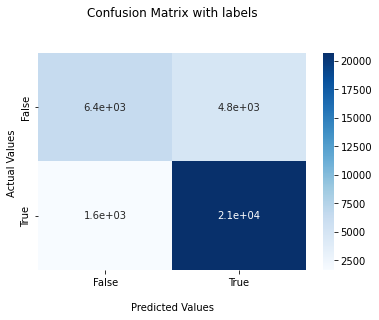

In [62]:
tuned_cb = CatBoostClassifier(learning_rate=0.2,n_estimators=200,num_leaves=31)
tuned_cb.fit(X_train,y_train)
acc1 = accuracy_score(tuned_cb.predict(X_train), y_train)
print("The training accuracy for our tuned CatBoost model is ", round(acc1, 3))
y_hat_test = tuned_cb.predict(X_test)
acc2 = accuracy_score(y_hat_test, y_test)
print("The testing accuracy for our tuned CatBoost model is ", round(acc2, 3))
plot_cm(y_test, y_hat_test)

## Conclusion
We chose the LGBMClassifier as our best preforming model due to accuracy score, confusion matrix, and run time.  
A Gradient Boosting Decision tree is a very popular machine learning algorithm that has effective implementations and many optimization techniques are actually adopted from this algorithm. The efficiency and scalability of the model are not quite up to the mark when there are more features in the data. For this specific behavior, the major reason is that each feature should scan all the various data instances to make an estimate of all the possible split points which is very time-consuming and tedious. To solve this problem, The LGBM or Light Gradient Boosting Model is used. It uses two types of techniques which are gradient Based on side sampling or GOSS and Exclusive Feature bundling or EFB.

The training accuracy for our tuned LGBM model is  0.818
The testing accuracy for our tuned LGBM model is  0.812


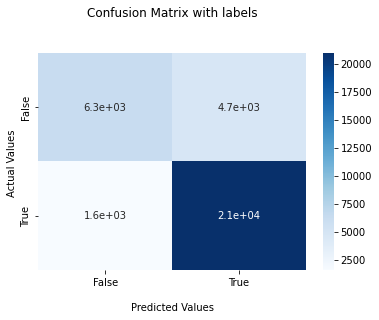

In [30]:
tuned_lgbm = LGBMClassifier(learning_rate=0.05,n_estimators=200,num_leaves=50)
tuned_lgbm.fit(X_train,y_train)

acc1 = accuracy_score(tuned_lgbm.predict(X_train), y_train)
print("The training accuracy for our tuned LGBM model is ", round(acc1, 3))
y_hat_test = tuned_lgbm.predict(X_test)
acc2 = accuracy_score(y_hat_test, y_test)
print("The testing accuracy for our tuned LGBM model is ", round(acc2, 3))
plot_cm(y_test, y_hat_test)

Our final model predicts whether a user will skip on a Spoitfy song with ~81% accuracy.